In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from scipy import stats

%matplotlib inline

In [2]:
def r2(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

# Dados

In [4]:
data = pd.read_parquet('../data/features_x1.parquet')

In [5]:
data.head()

,X1_mean,X1_median,X1_std,X1_var,X1_min,X1_max,X1_kurtosis,X1_skew,X1_q1,X1_q2,...,H38,H39,H40,H41,H42,H43,H44,H45,y1,y2
0,0.057196,0.059199,0.146003,0.021317,-0.226980,0.349978,-1.039076,-0.000334,-0.070688,0.059199,...,25,18,14,4,6,8,10,17,5.71,9.94
1,0.054457,0.053335,0.103370,0.010685,-0.175945,0.244155,-0.846539,-0.081680,-0.019104,0.053335,...,21,20,21,24,23,18,20,18,8.19,7.46
2,0.080405,0.078162,0.143315,0.020539,-0.224725,0.346551,-0.889740,-0.040701,-0.023844,0.078162,...,21,23,19,20,19,20,19,19,5.77,6.68
3,0.120101,0.122932,0.186913,0.034936,-0.355232,0.525114,-0.249520,-0.062862,0.004132,0.122932,...,15,11,11,15,19,6,8,19,8.25,2.45
4,0.063896,0.062504,0.124421,0.015480,-0.223503,0.291479,-0.813166,-0.096203,-0.024704,0.062504,...,22,25,20,21,24,19,21,20,6.86,4.56


In [6]:
X = data.drop(columns=['y1', 'y2'])
y = data[['y1', 'y2']]

In [7]:
scaler = MinMaxScaler()

Divisão em treino e teste

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Rede Neural Base

In [10]:
# base_model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(128, activation='leaky_relu'),
#     tf.keras.layers.Dense(64, activation='leaky_relu'),
#     tf.keras.layers.Dense(2, activation='linear')
# ])

# base_model.compile(
#     optimizer=tf.keras.optimizers.Adam(),
#     loss=tf.keras.losses.MeanSquaredError(),
#     metrics = [r2]
# )

In [12]:
# base_history = base_model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
1688/1688 [==============================] - 3s 1ms/step - loss: 2.0457 - r2: 0.6984
Epoch 2/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.0063 - r2: 0.8504
Epoch 3/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.8466 - r2: 0.8740
Epoch 4/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7276 - r2: 0.8915
Epoch 5/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6448 - r2: 0.9042
Epoch 6/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5851 - r2: 0.9128
Epoch 7/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5397 - r2: 0.9198
Epoch 8/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4936 - r2: 0.9267
Epoch 9/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4594 - r2: 0.9316
Epoch 10/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4342 - r2: 0.9353
Epoch 11/200
1688/1688 [=====

1688/1688 [==============================] - 3s 2ms/step - loss: 0.1072 - r2: 0.9840
Epoch 168/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1075 - r2: 0.9839
Epoch 169/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1057 - r2: 0.9842
Epoch 170/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1055 - r2: 0.9843
Epoch 171/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1051 - r2: 0.9842
Epoch 172/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1013 - r2: 0.9848
Epoch 173/200
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1051 - r2: 0.9842
Epoch 174/200
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1055 - r2: 0.9842
Epoch 175/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1041 - r2: 0.9845
Epoch 176/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1023 - r2: 0.9847
Epoch 177/200
1688/1688 

Importe o modelo base já salvo

In [24]:
base_model = tf.keras.models.load_model('base_model', custom_objects={'r2': r2})

In [25]:
base_model.evaluate(X_test, y_test)
pred = base_model.predict(X_test, verbose=0)

422/422 [==============================] - 1s 1ms/step - loss: 0.1238 - r2: 0.9816


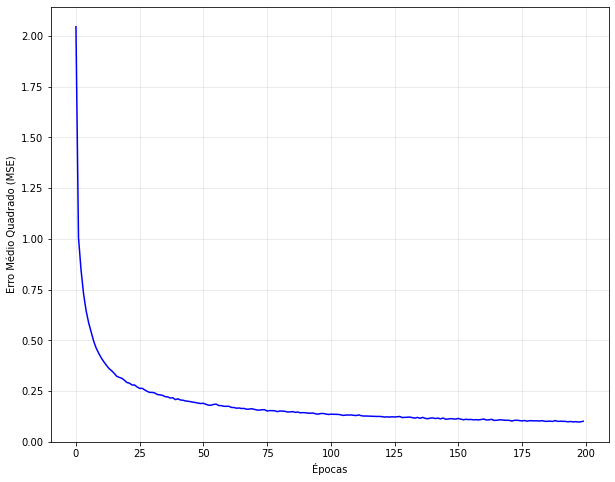

In [39]:
loss = base_history.history["loss"]
coef = base_history.history["r2"]
epochs = range(200)

plt.figure(figsize=(10, 8))
plt.plot(epochs, loss, color='b')
plt.grid(alpha=0.3)
plt.xlabel("Épocas")
plt.ylabel("Erro Médio Quadrado (MSE)")
plt.savefig('img/base_model_mse.png')
plt.show()

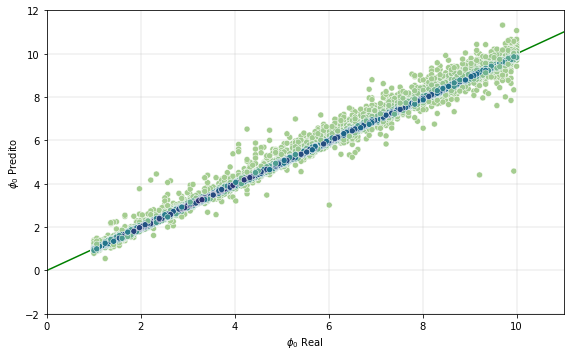

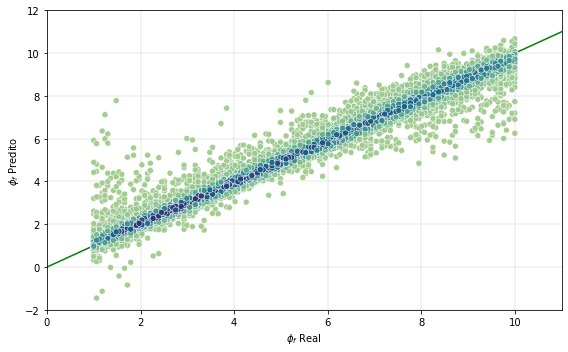

In [62]:
values = np.vstack([y_test.to_numpy()[:, 0], pred[:, 0]])
kernel = stats.gaussian_kde(values)(values)

plt.figure(figsize=(8, 5))
plt.plot([0, 15], [0, 15], c='g', zorder=0)
sns.scatterplot(x=y_test.to_numpy()[:, 0], y=pred[:, 0], c=kernel, cmap='crest', zorder=2)
plt.ylabel('$\phi_0$ Predito')
plt.xlabel('$\phi_0$ Real')
plt.grid(lw=.3)
plt.tight_layout()
plt.axis([0, 11, -2, 12])
plt.savefig('img/corr_phi0_base_nn_all_dataset_cmap.svg')
plt.show()


values = np.vstack([y_test.to_numpy()[:, 1], pred[:, 1]])
kernel = stats.gaussian_kde(values)(values)

plt.figure(figsize=(8, 5))
plt.plot([0, 15], [0, 15], c='g', zorder=0)
sns.scatterplot(x=y_test.to_numpy()[:, 1], y=pred[:, 1], c=kernel, cmap='crest', zorder=2)
plt.ylabel('$\phi_f$ Predito')
plt.xlabel('$\phi_f$ Real')
plt.axis([0, 11, -2, 12])
plt.grid(lw=.3)
plt.tight_layout()
plt.savefig('img/corr_phif_base_nn_all_dataset_cmap.svg')
plt.show()

# Rede Neural Otimizada

In [12]:
# optimal_model = tf.keras.models.Sequential([
#     tf.keras.layers.Input(56),
#     tf.keras.layers.Dense(190, activation='relu'),
#     tf.keras.layers.Dense(190, activation='relu'),
#     tf.keras.layers.Dense(2, activation='linear')
# ])

# optimal_model.compile(
#     optimizer=tf.keras.optimizers.Adam(),
#     loss=tf.keras.losses.MeanSquaredError(),
#     metrics = [r2]
# )

In [14]:
# optimal_history = optimal_model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
1688/1688 [==============================] - 3s 2ms/step - loss: 1.6945 - r2: 0.7489
Epoch 2/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.7751 - r2: 0.8847
Epoch 3/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.6314 - r2: 0.9060
Epoch 4/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5392 - r2: 0.9198
Epoch 5/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4707 - r2: 0.9299
Epoch 6/200
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4260 - r2: 0.9368
Epoch 7/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3872 - r2: 0.9424
Epoch 8/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3523 - r2: 0.9475
Epoch 9/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3294 - r2: 0.9510
Epoch 10/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3137 - r2: 0.9533
Epoch 11/200
1688/1688 [=====

1688/1688 [==============================] - 3s 2ms/step - loss: 0.0959 - r2: 0.9857
Epoch 85/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0974 - r2: 0.9854
Epoch 86/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0924 - r2: 0.9862
Epoch 87/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0945 - r2: 0.9859
Epoch 88/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0900 - r2: 0.9866
Epoch 89/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0915 - r2: 0.9864
Epoch 90/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0899 - r2: 0.9866
Epoch 91/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0915 - r2: 0.9863
Epoch 92/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0890 - r2: 0.9866
Epoch 93/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0934 - r2: 0.9860
Epoch 94/200
1688/1688 [=========

1688/1688 [==============================] - 4s 2ms/step - loss: 0.0604 - r2: 0.9909
Epoch 168/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0619 - r2: 0.9907
Epoch 169/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0601 - r2: 0.9910
Epoch 170/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0613 - r2: 0.9908
Epoch 171/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0604 - r2: 0.9910
Epoch 172/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0598 - r2: 0.9911
Epoch 173/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0607 - r2: 0.9909
Epoch 174/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0582 - r2: 0.9913
Epoch 175/200
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0612 - r2: 0.9908
Epoch 176/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0603 - r2: 0.9910
Epoch 177/200
1688/1688 

Importe o modelo já treinado

In [3]:
optimal_model = tf.keras.models.load_model('optimal_model', custom_objects={'r2': r2})

In [10]:
print(optimal_model.evaluate(X_test, y_test))
pred_opt = optimal_model.predict(X_test, verbose=0)

422/422 [==============================] - 1s 1ms/step - loss: 0.0737 - r2: 0.9890
[0.07367615401744843, 0.988988995552063]


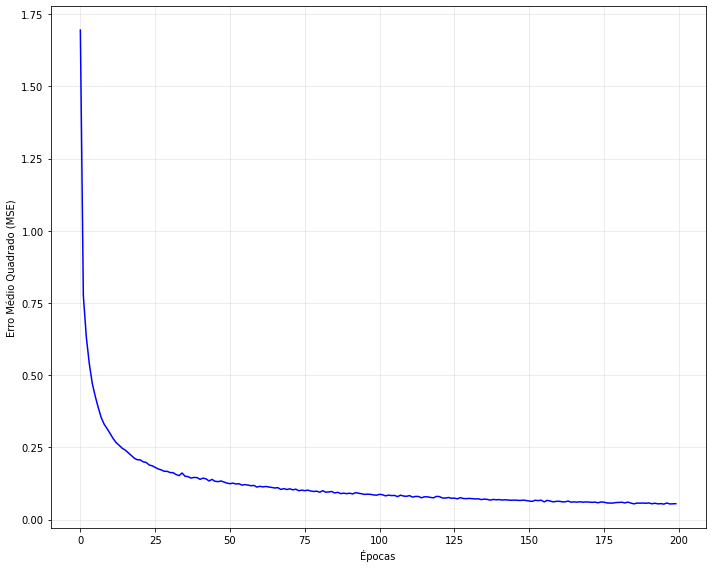

In [21]:
loss_opt = optimal_history.history["loss"]
coef_opt = optimal_history.history["r2"]
epochs = range(200)

plt.figure(figsize=(10, 8))
plt.plot(epochs, loss_opt, color='b')
plt.grid(alpha=0.3)
plt.xlabel("Épocas")
plt.ylabel("Erro Médio Quadrado (MSE)")
plt.tight_layout()
plt.savefig('img/optimal_model_mse.pdf')
plt.show()

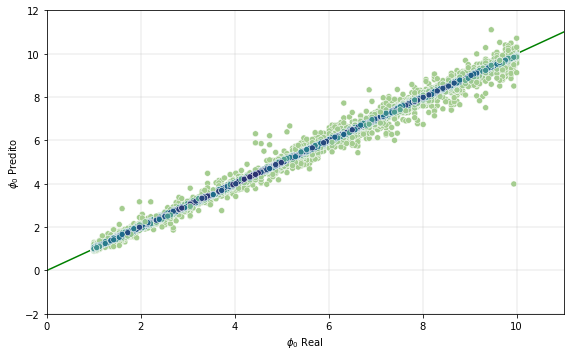

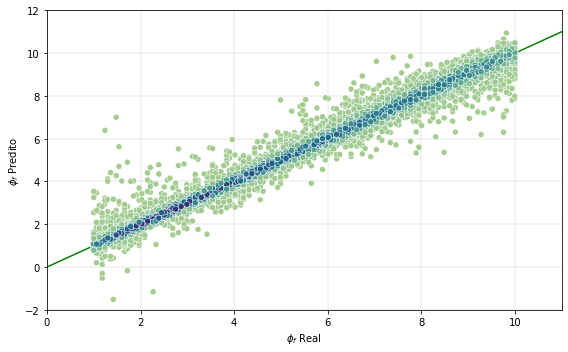

In [13]:
values = np.vstack([y_test.to_numpy()[:, 0], pred_opt[:, 0]])
kernel = stats.gaussian_kde(values)(values)

plt.figure(figsize=(8, 5))
plt.plot([0, 15], [0, 15], c='g', zorder=0)
sns.scatterplot(x=y_test.to_numpy()[:, 0], y=pred_opt[:, 0], c=kernel, cmap='crest', zorder=2)
plt.ylabel('$\phi_0$ Predito')
plt.xlabel('$\phi_0$ Real')
plt.grid(lw=.3)
plt.tight_layout()
plt.axis([0, 11, -2, 12])
plt.savefig('img/corr_phi0_optimal_nn_all_dataset_cmap.pdf')
plt.show()


values = np.vstack([y_test.to_numpy()[:, 1], pred_opt[:, 1]])
kernel = stats.gaussian_kde(values)(values)

plt.figure(figsize=(8, 5))
plt.plot([0, 15], [0, 15], c='g', zorder=0)
sns.scatterplot(x=y_test.to_numpy()[:, 1], y=pred_opt[:, 1], c=kernel, cmap='crest', zorder=2)
plt.ylabel('$\phi_f$ Predito')
plt.xlabel('$\phi_f$ Real')
plt.axis([0, 11, -2, 12])
plt.grid(lw=.3)
plt.tight_layout()
plt.savefig('img/corr_phif_optimal_nn_all_dataset_cmap.pdf')
plt.show()

# Comparação dos modelos

In [2]:
models_metrics = np.array(
    [
        [
            0.03882093,
            0.20878585,
            0.12380338900521437,
            0.99433818,
            0.96960935,
            0.9819737663693989,
        ],
        [
            0.02155564,
            0.1257967,
            0.07367616944927292,
            0.99685623,
            0.98168916,
            0.9892726966706391,
        ],
    ]
)
models_metrics = pd.DataFrame(
    models_metrics,
    index=["Rede Neural Base", "Rede Neural Otimizada"],
    columns=["MSE $\phi_0$", "MSE $\phi_f$", "MSE$_{mean}$", "$R^2$ $\phi_0$", "$R^2$ $\phi_f$", "$R^2_{mean}$"],
)

In [3]:
models_metrics

,MSE $\phi_0$,MSE $\phi_f$,MSE$_{mean}$,$R^2$ $\phi_0$,$R^2$ $\phi_f$,$R^2_{mean}$
Rede Neural Base,0.038821,0.208786,0.123803,0.994338,0.969609,0.981974
Rede Neural Otimizada,0.021556,0.125797,0.073676,0.996856,0.981689,0.989273


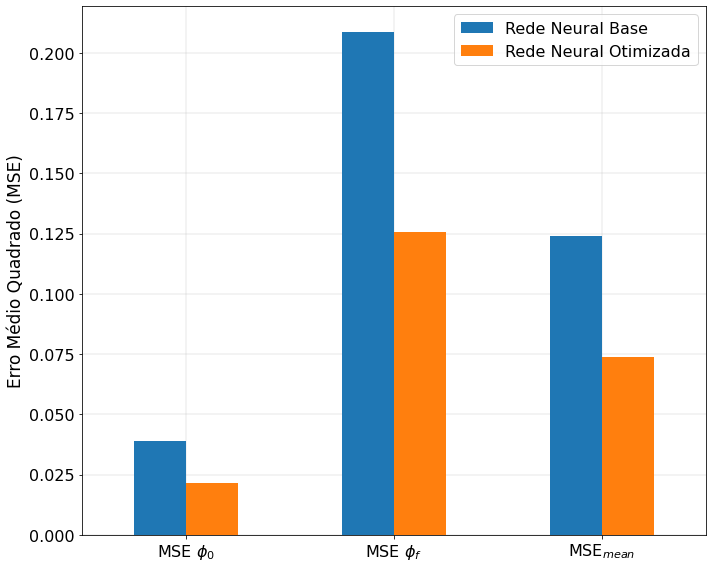

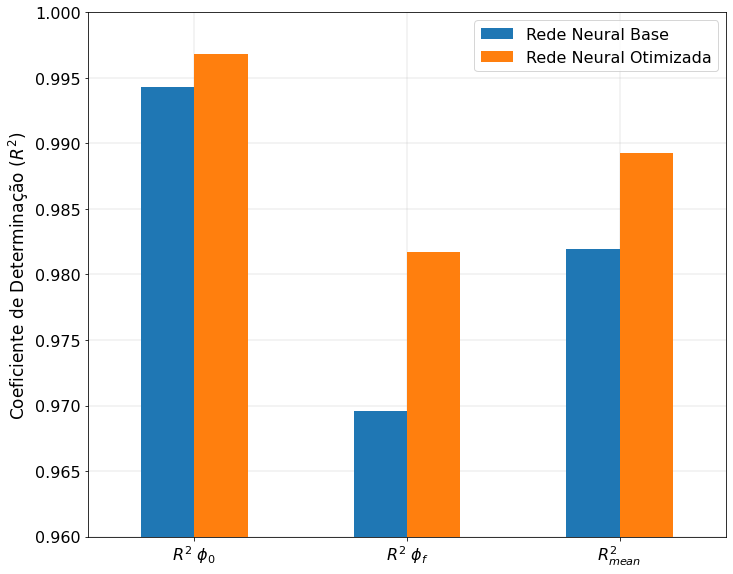

In [18]:
models_metrics.iloc[:, :3].T.plot.bar(rot=0, figsize=(10, 8), zorder=2, fontsize=16)
plt.grid(lw=0.3)
plt.ylabel("Erro Médio Quadrado (MSE)", fontsize=17)
plt.legend(fontsize=16)
plt.tight_layout()
# plt.savefig('img/mse_comparison_models.pdf', dpi=600)
plt.show()

models_metrics.iloc[:, 3:].T.plot.bar(rot=0, figsize=(10, 8), zorder=2, fontsize=16)
plt.grid(lw=0.3)
plt.ylabel("Coeficiente de Determinação ($R^2$)", fontsize=17)
plt.tight_layout()
plt.ylim([0.96, 1])
plt.legend(fontsize=16)
# plt.savefig('img/r2_comparison_models.pdf', dpi=600)
plt.show()

# Feature Selection com XGBoost

Não precisa executar mais os blocos abaixos, importe features_importances com o pandas

In [8]:
# xgb = XGBRegressor(random_state=123, eval_metric=root_mean_squared_error)

In [9]:
# xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False,
             eval_metric=<function root_mean_squared_error at 0x000001DB2F2FC670>,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=123, ...)

In [10]:
# importances = xgb.feature_importances_
# features = X.columns
# features_importances = pd.Series(data=importances, index=features).sort_values(ascending=False)

In [127]:
features_importances = pd.read_csv('../data/features_importances.csv', index_col=0)

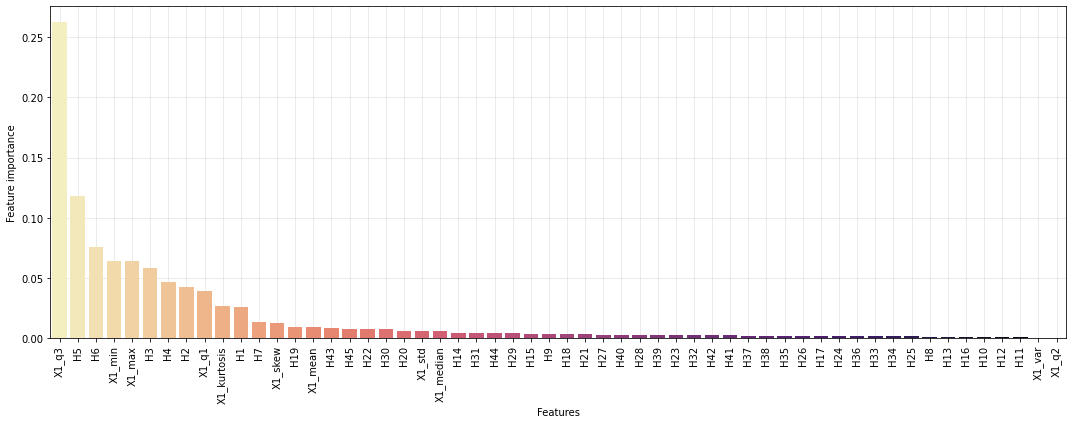

In [257]:
plt.figure(figsize=(15, 6))
sns.barplot(
    x=features_importances.index,
    y=np.squeeze(features_importances.values),
    palette="magma_r",
    zorder=2,
)
plt.xticks(rotation="vertical")
plt.ylabel("Feature importance")
plt.xlabel("Features")
plt.grid(alpha=0.3)
plt.tight_layout()
#plt.savefig('img/features_importances.pdf', format='pdf')
plt.show()

# Análise das k-melhores features com XGboost

Análise da performance do modelo XGBoost com as k-melhores features

In [133]:
# def get_model():
#     base_model = tf.keras.models.Sequential(
#         [
#             tf.keras.layers.Dense(190, activation="relu"),
#             tf.keras.layers.Dense(190, activation="relu"),
#             tf.keras.layers.Dense(2, activation="linear"),
#         ]
#     )
    
#     base_model.compile(optimizer="Adam", loss="mean_squared_error", metrics=r2)
    
#     return base_model

Já foi rodado este bloco abaixo, carregar os dados com o pickle

In [138]:
# MSEphi0, MSEphif, MSE, R2phi0, R2phif, R2, preds = [], [], [], [], [], [], []

# for n_features in range(1, features_importances.size + 1):
#     print("-" * 20)
#     print(f"{n_features}-best features\n\n")
#     X_f_train = X_train[features_importances[:n_features].index]
#     X_f_test = X_test[features_importances[:n_features].index]

#     feat_model = get_model()
#     feat_model.fit(X_f_train, y_train, epochs=200, verbose=1)
#     y_pred = feat_model.predict(X_f_test, verbose=0)
    
#     preds.append(y_pred)
    
#     MSEphi0.append(mean_squared_error(y_test.iloc[:,0], y_pred[:, 0]))
#     MSEphif.append(mean_squared_error(y_test.iloc[:,1], y_pred[:, 1]))
#     MSE.append(mean_squared_error(y_test, y_pred))
    
#     R2phi0.append(r2_score(y_test.iloc[:,0], y_pred[:, 0]))
#     R2phif.append(r2_score(y_test.iloc[:,1], y_pred[:, 1]))
#     R2.append(r2_score(y_test, y_pred))
    
#     print("-" * 20 + "\n\n")

--------------------
1-best features


Epoch 1/200
1688/1688 [==============================] - 3s 2ms/step - loss: 5.2061 - r2: 0.2252
Epoch 2/200
1688/1688 [==============================] - 2s 1ms/step - loss: 4.0139 - r2: 0.4032
Epoch 3/200
1688/1688 [==============================] - 2s 1ms/step - loss: 4.0151 - r2: 0.4025
Epoch 4/200
1688/1688 [==============================] - 2s 1ms/step - loss: 4.0141 - r2: 0.4030
Epoch 5/200
1688/1688 [==============================] - 2s 1ms/step - loss: 4.0133 - r2: 0.4037
Epoch 6/200
1688/1688 [==============================] - 2s 1ms/step - loss: 4.0097 - r2: 0.4035
Epoch 7/200
1688/1688 [==============================] - 2s 1ms/step - loss: 4.0100 - r2: 0.4031
Epoch 8/200
1688/1688 [==============================] - 2s 1ms/step - loss: 4.0116 - r2: 0.4035
Epoch 9/200
1688/1688 [==============================] - 2s 1ms/step - loss: 4.0113 - r2: 0.4036
Epoch 10/200
1688/1688 [==============================] - 2s 1ms/step - loss: 4.0079 - r

1688/1688 [==============================] - 2s 1ms/step - loss: 3.9956 - r2: 0.4065
Epoch 85/200
1688/1688 [==============================] - 2s 1ms/step - loss: 3.9938 - r2: 0.4061
Epoch 86/200
1688/1688 [==============================] - 2s 1ms/step - loss: 3.9944 - r2: 0.4061
Epoch 87/200
1688/1688 [==============================] - 2s 1ms/step - loss: 3.9967 - r2: 0.4053
Epoch 88/200
1688/1688 [==============================] - 2s 1ms/step - loss: 3.9947 - r2: 0.4058
Epoch 89/200
1688/1688 [==============================] - 2s 1ms/step - loss: 3.9938 - r2: 0.4055
Epoch 90/200
1688/1688 [==============================] - 2s 1ms/step - loss: 3.9929 - r2: 0.4058
Epoch 91/200
1688/1688 [==============================] - 2s 1ms/step - loss: 3.9947 - r2: 0.4062
Epoch 92/200
1688/1688 [==============================] - 2s 1ms/step - loss: 3.9951 - r2: 0.4058
Epoch 93/200
1688/1688 [==============================] - 2s 1ms/step - loss: 3.9933 - r2: 0.4062
Epoch 94/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 3.9922 - r2: 0.4064
Epoch 168/200
1688/1688 [==============================] - 3s 2ms/step - loss: 3.9912 - r2: 0.4064
Epoch 169/200
1688/1688 [==============================] - 3s 2ms/step - loss: 3.9903 - r2: 0.4064
Epoch 170/200
1688/1688 [==============================] - 3s 2ms/step - loss: 3.9919 - r2: 0.4059
Epoch 171/200
1688/1688 [==============================] - 3s 2ms/step - loss: 3.9909 - r2: 0.4062
Epoch 172/200
1688/1688 [==============================] - 3s 2ms/step - loss: 3.9914 - r2: 0.4065
Epoch 173/200
1688/1688 [==============================] - 2s 1ms/step - loss: 3.9902 - r2: 0.4066
Epoch 174/200
1688/1688 [==============================] - 2s 1ms/step - loss: 3.9913 - r2: 0.4069
Epoch 175/200
1688/1688 [==============================] - 2s 1ms/step - loss: 3.9904 - r2: 0.4060
Epoch 176/200
1688/1688 [==============================] - 2s 1ms/step - loss: 3.9912 - r2: 0.4062
Epoch 177/200
1688/1688 

1688/1688 [==============================] - 4s 2ms/step - loss: 2.4043 - r2: 0.6423
Epoch 50/200
1688/1688 [==============================] - 3s 2ms/step - loss: 2.4010 - r2: 0.6422
Epoch 51/200
1688/1688 [==============================] - 2s 1ms/step - loss: 2.4053 - r2: 0.6421
Epoch 52/200
1688/1688 [==============================] - 2s 1ms/step - loss: 2.4018 - r2: 0.6430
Epoch 53/200
1688/1688 [==============================] - 2s 1ms/step - loss: 2.3998 - r2: 0.6430
Epoch 54/200
1688/1688 [==============================] - 3s 2ms/step - loss: 2.4004 - r2: 0.6430
Epoch 55/200
1688/1688 [==============================] - 3s 2ms/step - loss: 2.4010 - r2: 0.6432
Epoch 56/200
1688/1688 [==============================] - 3s 2ms/step - loss: 2.3995 - r2: 0.6423
Epoch 57/200
1688/1688 [==============================] - 3s 2ms/step - loss: 2.4020 - r2: 0.6421
Epoch 58/200
1688/1688 [==============================] - 3s 2ms/step - loss: 2.3994 - r2: 0.6428
Epoch 59/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 2.3884 - r2: 0.6445
Epoch 133/200
1688/1688 [==============================] - 2s 1ms/step - loss: 2.3867 - r2: 0.6447
Epoch 134/200
1688/1688 [==============================] - 2s 1ms/step - loss: 2.3891 - r2: 0.6444
Epoch 135/200
1688/1688 [==============================] - 2s 1ms/step - loss: 2.3874 - r2: 0.6449
Epoch 136/200
1688/1688 [==============================] - 2s 1ms/step - loss: 2.3869 - r2: 0.6449
Epoch 137/200
1688/1688 [==============================] - 2s 1ms/step - loss: 2.3864 - r2: 0.6450
Epoch 138/200
1688/1688 [==============================] - 2s 1ms/step - loss: 2.3868 - r2: 0.6443
Epoch 139/200
1688/1688 [==============================] - 2s 1ms/step - loss: 2.3863 - r2: 0.6447
Epoch 140/200
1688/1688 [==============================] - 2s 1ms/step - loss: 2.3868 - r2: 0.6444
Epoch 141/200
1688/1688 [==============================] - 3s 2ms/step - loss: 2.3855 - r2: 0.6450
Epoch 142/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 2.0161 - r2: 0.7007
Epoch 15/200
1688/1688 [==============================] - 2s 1ms/step - loss: 2.0084 - r2: 0.7014
Epoch 16/200
1688/1688 [==============================] - 3s 2ms/step - loss: 2.0000 - r2: 0.7029
Epoch 17/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.9961 - r2: 0.7030
Epoch 18/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.9903 - r2: 0.7043
Epoch 19/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.9860 - r2: 0.7047
Epoch 20/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.9755 - r2: 0.7061
Epoch 21/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.9739 - r2: 0.7068
Epoch 22/200
1688/1688 [==============================] - 3s 2ms/step - loss: 1.9691 - r2: 0.7074
Epoch 23/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.9631 - r2: 0.7082
Epoch 24/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 1.8704 - r2: 0.7221
Epoch 98/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.8677 - r2: 0.7227
Epoch 99/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.8665 - r2: 0.7223
Epoch 100/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.8677 - r2: 0.7223
Epoch 101/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.8676 - r2: 0.7222
Epoch 102/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.8670 - r2: 0.7221
Epoch 103/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.8675 - r2: 0.7217
Epoch 104/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.8645 - r2: 0.7227
Epoch 105/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.8670 - r2: 0.7223
Epoch 106/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.8647 - r2: 0.7231
Epoch 107/200
1688/1688 [=

1688/1688 [==============================] - 2s 1ms/step - loss: 1.8312 - r2: 0.7278
Epoch 180/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.8298 - r2: 0.7275
Epoch 181/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.8329 - r2: 0.7274
Epoch 182/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.8310 - r2: 0.7274
Epoch 183/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.8312 - r2: 0.7277
Epoch 184/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.8289 - r2: 0.7278
Epoch 185/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.8296 - r2: 0.7277
Epoch 186/200
1688/1688 [==============================] - 3s 1ms/step - loss: 1.8293 - r2: 0.7279
Epoch 187/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.8271 - r2: 0.7286
Epoch 188/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.8273 - r2: 0.7280
Epoch 189/200
1688/1688 

Epoch 62/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.3639 - r2: 0.7971
Epoch 63/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.3677 - r2: 0.7965
Epoch 64/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.3614 - r2: 0.7978
Epoch 65/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.3621 - r2: 0.7974
Epoch 66/200
1688/1688 [==============================] - 3s 2ms/step - loss: 1.3553 - r2: 0.7985
Epoch 67/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.3613 - r2: 0.7975
Epoch 68/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.3548 - r2: 0.7988
Epoch 69/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.3555 - r2: 0.7987
Epoch 70/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.3550 - r2: 0.7989
Epoch 71/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.3461 - r2: 0.7999
Epoch 72/200
1688/16

1688/1688 [==============================] - 2s 1ms/step - loss: 1.2849 - r2: 0.8087
Epoch 146/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.2858 - r2: 0.8089
Epoch 147/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.2866 - r2: 0.8085
Epoch 148/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.2814 - r2: 0.8097
Epoch 149/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.2850 - r2: 0.8094
Epoch 150/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.2836 - r2: 0.8091
Epoch 151/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.2838 - r2: 0.8089
Epoch 152/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.2852 - r2: 0.8090
Epoch 153/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.2787 - r2: 0.8100
Epoch 154/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.2851 - r2: 0.8091
Epoch 155/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 1.2158 - r2: 0.8193
Epoch 28/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.2037 - r2: 0.8210
Epoch 29/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.1953 - r2: 0.8221
Epoch 30/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.1886 - r2: 0.8234
Epoch 31/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.1873 - r2: 0.8235
Epoch 32/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.1842 - r2: 0.8241
Epoch 33/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.1654 - r2: 0.8267
Epoch 34/200
1688/1688 [==============================] - 2s 1ms/step - loss: 1.1655 - r2: 0.8268
Epoch 35/200
1688/1688 [==============================] - 3s 2ms/step - loss: 1.1611 - r2: 0.8274
Epoch 36/200
1688/1688 [==============================] - 3s 1ms/step - loss: 1.1592 - r2: 0.8277
Epoch 37/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.9688 - r2: 0.8559
Epoch 111/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.9600 - r2: 0.8573
Epoch 112/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.9622 - r2: 0.8569
Epoch 113/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.9650 - r2: 0.8565
Epoch 114/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.9595 - r2: 0.8573
Epoch 115/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.9611 - r2: 0.8568
Epoch 116/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.9574 - r2: 0.8579
Epoch 117/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.9568 - r2: 0.8576
Epoch 118/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.9564 - r2: 0.8577
Epoch 119/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.9568 - r2: 0.8577
Epoch 120/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.8967 - r2: 0.8664
Epoch 193/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.8974 - r2: 0.8665
Epoch 194/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.8962 - r2: 0.8668
Epoch 195/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.8946 - r2: 0.8667
Epoch 196/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.8885 - r2: 0.8680
Epoch 197/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.8933 - r2: 0.8669
Epoch 198/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.8903 - r2: 0.8676
Epoch 199/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.8901 - r2: 0.8674
Epoch 200/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.8883 - r2: 0.8675
--------------------


--------------------
6-best features


Epoch 1/200
1688/1688 [==============================] - 3s 1

1688/1688 [==============================] - 2s 1ms/step - loss: 0.7421 - r2: 0.8898
Epoch 76/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7394 - r2: 0.8901
Epoch 77/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7375 - r2: 0.8901
Epoch 78/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7364 - r2: 0.8902
Epoch 79/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7281 - r2: 0.8912
Epoch 80/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7297 - r2: 0.8911
Epoch 81/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7288 - r2: 0.8915
Epoch 82/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7256 - r2: 0.8917
Epoch 83/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.7237 - r2: 0.8924
Epoch 84/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7197 - r2: 0.8929
Epoch 85/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.6433 - r2: 0.9041
Epoch 159/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6436 - r2: 0.9041
Epoch 160/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6409 - r2: 0.9045
Epoch 161/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6415 - r2: 0.9044
Epoch 162/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6406 - r2: 0.9046
Epoch 163/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6431 - r2: 0.9043
Epoch 164/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6380 - r2: 0.9051
Epoch 165/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6403 - r2: 0.9046
Epoch 166/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6381 - r2: 0.9048
Epoch 167/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6355 - r2: 0.9054
Epoch 168/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.7271 - r2: 0.8921
Epoch 41/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7155 - r2: 0.8936
Epoch 42/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7212 - r2: 0.8929
Epoch 43/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7194 - r2: 0.8929
Epoch 44/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7099 - r2: 0.8946
Epoch 45/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7099 - r2: 0.8947
Epoch 46/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7059 - r2: 0.8953
Epoch 47/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7028 - r2: 0.8956
Epoch 48/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7022 - r2: 0.8959
Epoch 49/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6990 - r2: 0.8961
Epoch 50/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.5758 - r2: 0.9144
Epoch 124/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5803 - r2: 0.9138
Epoch 125/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5757 - r2: 0.9146
Epoch 126/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5755 - r2: 0.9142
Epoch 127/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5740 - r2: 0.9146
Epoch 128/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5731 - r2: 0.9148
Epoch 129/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5735 - r2: 0.9145
Epoch 130/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5729 - r2: 0.9148
Epoch 131/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5697 - r2: 0.9150
Epoch 132/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5720 - r2: 0.9149
Epoch 133/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 1.0052 - r2: 0.8504
Epoch 6/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.9586 - r2: 0.8573
Epoch 7/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.9190 - r2: 0.8635
Epoch 8/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.8950 - r2: 0.8672
Epoch 9/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.8690 - r2: 0.8709
Epoch 10/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.8477 - r2: 0.8743
Epoch 11/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.8309 - r2: 0.8767
Epoch 12/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.8153 - r2: 0.8791
Epoch 13/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.8012 - r2: 0.8811
Epoch 14/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7839 - r2: 0.8838
Epoch 15/200
1688/1688 [=============

1688/1688 [==============================] - 2s 1ms/step - loss: 0.4982 - r2: 0.9259
Epoch 89/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4961 - r2: 0.9263
Epoch 90/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4976 - r2: 0.9259
Epoch 91/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4927 - r2: 0.9266
Epoch 92/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4879 - r2: 0.9271
Epoch 93/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4897 - r2: 0.9272
Epoch 94/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4921 - r2: 0.9270
Epoch 95/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4859 - r2: 0.9278
Epoch 96/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4870 - r2: 0.9275
Epoch 97/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4850 - r2: 0.9276
Epoch 98/200
1688/1688 [=========

1688/1688 [==============================] - 3s 1ms/step - loss: 0.4157 - r2: 0.9380
Epoch 172/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4150 - r2: 0.9380
Epoch 173/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4124 - r2: 0.9385
Epoch 174/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4134 - r2: 0.9384
Epoch 175/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4101 - r2: 0.9389
Epoch 176/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4167 - r2: 0.9377
Epoch 177/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4127 - r2: 0.9384
Epoch 178/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4105 - r2: 0.9388
Epoch 179/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4085 - r2: 0.9390
Epoch 180/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4110 - r2: 0.9385
Epoch 181/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.5568 - r2: 0.9170
Epoch 54/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5542 - r2: 0.9178
Epoch 55/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5525 - r2: 0.9178
Epoch 56/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5512 - r2: 0.9178
Epoch 57/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5471 - r2: 0.9187
Epoch 58/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5415 - r2: 0.9197
Epoch 59/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5420 - r2: 0.9193
Epoch 60/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5404 - r2: 0.9196
Epoch 61/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5369 - r2: 0.9200
Epoch 62/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5331 - r2: 0.9208
Epoch 63/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.4348 - r2: 0.9352
Epoch 137/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4274 - r2: 0.9363
Epoch 138/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4345 - r2: 0.9353
Epoch 139/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4307 - r2: 0.9361
Epoch 140/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4262 - r2: 0.9367
Epoch 141/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4267 - r2: 0.9365
Epoch 142/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4265 - r2: 0.9366
Epoch 143/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4292 - r2: 0.9363
Epoch 144/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4260 - r2: 0.9365
Epoch 145/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.4245 - r2: 0.9369
Epoch 146/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.6446 - r2: 0.9043
Epoch 19/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6352 - r2: 0.9054
Epoch 20/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6238 - r2: 0.9074
Epoch 21/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.6285 - r2: 0.9065
Epoch 22/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.6176 - r2: 0.9084
Epoch 23/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6089 - r2: 0.9096
Epoch 24/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6031 - r2: 0.9102
Epoch 25/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5957 - r2: 0.9112
Epoch 26/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5890 - r2: 0.9125
Epoch 27/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5888 - r2: 0.9127
Epoch 28/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.4174 - r2: 0.9379
Epoch 102/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4170 - r2: 0.9379
Epoch 103/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4176 - r2: 0.9379
Epoch 104/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4155 - r2: 0.9379
Epoch 105/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4132 - r2: 0.9385
Epoch 106/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4117 - r2: 0.9387
Epoch 107/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4117 - r2: 0.9388
Epoch 108/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4100 - r2: 0.9390
Epoch 109/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4056 - r2: 0.9396
Epoch 110/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4071 - r2: 0.9395
Epoch 111/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.3478 - r2: 0.9482
Epoch 184/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3439 - r2: 0.9487
Epoch 185/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3440 - r2: 0.9487
Epoch 186/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3399 - r2: 0.9493
Epoch 187/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3446 - r2: 0.9486
Epoch 188/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3421 - r2: 0.9490
Epoch 189/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3421 - r2: 0.9492
Epoch 190/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3383 - r2: 0.9494
Epoch 191/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3389 - r2: 0.9493
Epoch 192/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3403 - r2: 0.9494
Epoch 193/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.3778 - r2: 0.9436
Epoch 67/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3817 - r2: 0.9433
Epoch 68/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3777 - r2: 0.9437
Epoch 69/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3748 - r2: 0.9441
Epoch 70/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3740 - r2: 0.9443
Epoch 71/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3744 - r2: 0.9441
Epoch 72/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3697 - r2: 0.9449
Epoch 73/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3682 - r2: 0.9451
Epoch 74/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3683 - r2: 0.9452
Epoch 75/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3686 - r2: 0.9450
Epoch 76/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.3036 - r2: 0.9547
Epoch 150/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3007 - r2: 0.9551
Epoch 151/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3039 - r2: 0.9547
Epoch 152/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3043 - r2: 0.9548
Epoch 153/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3016 - r2: 0.9550
Epoch 154/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2994 - r2: 0.9554
Epoch 155/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2998 - r2: 0.9552
Epoch 156/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2990 - r2: 0.9553
Epoch 157/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2978 - r2: 0.9556
Epoch 158/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2998 - r2: 0.9554
Epoch 159/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.4347 - r2: 0.9352
Epoch 32/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4340 - r2: 0.9355
Epoch 33/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4294 - r2: 0.9362
Epoch 34/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4285 - r2: 0.9361
Epoch 35/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4211 - r2: 0.9375
Epoch 36/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4198 - r2: 0.9377
Epoch 37/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4210 - r2: 0.9374
Epoch 38/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4110 - r2: 0.9388
Epoch 39/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4104 - r2: 0.9389
Epoch 40/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4050 - r2: 0.9398
Epoch 41/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.3011 - r2: 0.9549
Epoch 115/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2994 - r2: 0.9553
Epoch 116/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2986 - r2: 0.9555
Epoch 117/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.2939 - r2: 0.9561
Epoch 118/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2948 - r2: 0.9561
Epoch 119/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2974 - r2: 0.9558
Epoch 120/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2936 - r2: 0.9561
Epoch 121/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2922 - r2: 0.9564
Epoch 122/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2910 - r2: 0.9565
Epoch 123/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2895 - r2: 0.9569
Epoch 124/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.2511 - r2: 0.9626
Epoch 197/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2511 - r2: 0.9625
Epoch 198/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2491 - r2: 0.9628
Epoch 199/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2490 - r2: 0.9628
Epoch 200/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2508 - r2: 0.9626
--------------------


--------------------
13-best features


Epoch 1/200
1688/1688 [==============================] - 3s 1ms/step - loss: 2.0455 - r2: 0.6946
Epoch 2/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.9618 - r2: 0.8572
Epoch 3/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.8075 - r2: 0.8796
Epoch 4/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7188 - r2: 0.8932
Epoch 5/200
1688/1688 [==============================] - 2s 1ms/step

1688/1688 [==============================] - 2s 1ms/step - loss: 0.2751 - r2: 0.9590
Epoch 80/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2747 - r2: 0.9590
Epoch 81/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2732 - r2: 0.9591
Epoch 82/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2679 - r2: 0.9600
Epoch 83/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2704 - r2: 0.9597
Epoch 84/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2714 - r2: 0.9595
Epoch 85/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2696 - r2: 0.9598
Epoch 86/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2668 - r2: 0.9602
Epoch 87/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2669 - r2: 0.9603
Epoch 88/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2657 - r2: 0.9605
Epoch 89/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1979 - r2: 0.9704
Epoch 163/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1996 - r2: 0.9701
Epoch 164/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2022 - r2: 0.9698
Epoch 165/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1982 - r2: 0.9704
Epoch 166/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1995 - r2: 0.9701
Epoch 167/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1980 - r2: 0.9703
Epoch 168/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1965 - r2: 0.9707
Epoch 169/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1951 - r2: 0.9709
Epoch 170/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1938 - r2: 0.9710
Epoch 171/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1972 - r2: 0.9706
Epoch 172/200
1688/1688 

1688/1688 [==============================] - 3s 1ms/step - loss: 0.3464 - r2: 0.9484
Epoch 45/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3454 - r2: 0.9487
Epoch 46/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.3403 - r2: 0.9493
Epoch 47/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3380 - r2: 0.9495
Epoch 48/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.3282 - r2: 0.9510
Epoch 49/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3293 - r2: 0.9507
Epoch 50/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3270 - r2: 0.9512
Epoch 51/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3256 - r2: 0.9515
Epoch 52/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.3239 - r2: 0.9517
Epoch 53/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3198 - r2: 0.9523
Epoch 54/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.2188 - r2: 0.9674
Epoch 128/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2195 - r2: 0.9672
Epoch 129/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2133 - r2: 0.9682
Epoch 130/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2204 - r2: 0.9670
Epoch 131/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2156 - r2: 0.9677
Epoch 132/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2177 - r2: 0.9674
Epoch 133/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2103 - r2: 0.9686
Epoch 134/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2107 - r2: 0.9686
Epoch 135/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2125 - r2: 0.9683
Epoch 136/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2117 - r2: 0.9683
Epoch 137/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.5603 - r2: 0.9163
Epoch 10/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5330 - r2: 0.9207
Epoch 11/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5231 - r2: 0.9224
Epoch 12/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5062 - r2: 0.9247
Epoch 13/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4964 - r2: 0.9262
Epoch 14/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4833 - r2: 0.9282
Epoch 15/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4737 - r2: 0.9294
Epoch 16/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4593 - r2: 0.9317
Epoch 17/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4557 - r2: 0.9321
Epoch 18/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4415 - r2: 0.9343
Epoch 19/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.2242 - r2: 0.9666
Epoch 93/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2226 - r2: 0.9667
Epoch 94/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2245 - r2: 0.9664
Epoch 95/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2197 - r2: 0.9672
Epoch 96/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2216 - r2: 0.9669
Epoch 97/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2187 - r2: 0.9673
Epoch 98/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2212 - r2: 0.9670
Epoch 99/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.2175 - r2: 0.9676
Epoch 100/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2170 - r2: 0.9676
Epoch 101/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2151 - r2: 0.9679
Epoch 102/200
1688/1688 [======

Epoch 175/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1673 - r2: 0.9750
Epoch 176/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1659 - r2: 0.9753
Epoch 177/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1657 - r2: 0.9753
Epoch 178/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1663 - r2: 0.9751
Epoch 179/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1644 - r2: 0.9755
Epoch 180/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1638 - r2: 0.9756
Epoch 181/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1664 - r2: 0.9750
Epoch 182/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1630 - r2: 0.9756
Epoch 183/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1655 - r2: 0.9752
Epoch 184/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1630 - r2: 0.9756
Epoch 185/

1688/1688 [==============================] - 2s 1ms/step - loss: 0.2820 - r2: 0.9580
Epoch 58/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2750 - r2: 0.9590
Epoch 59/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2759 - r2: 0.9589
Epoch 60/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2703 - r2: 0.9596
Epoch 61/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.2714 - r2: 0.9596
Epoch 62/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2727 - r2: 0.9595
Epoch 63/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2697 - r2: 0.9596
Epoch 64/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2653 - r2: 0.9604
Epoch 65/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2629 - r2: 0.9609
Epoch 66/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2659 - r2: 0.9604
Epoch 67/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1860 - r2: 0.9722
Epoch 141/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1892 - r2: 0.9717
Epoch 142/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1880 - r2: 0.9718
Epoch 143/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1814 - r2: 0.9728
Epoch 144/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1843 - r2: 0.9724
Epoch 145/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1837 - r2: 0.9725
Epoch 146/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1862 - r2: 0.9721
Epoch 147/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1799 - r2: 0.9731
Epoch 148/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1851 - r2: 0.9723
Epoch 149/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1824 - r2: 0.9726
Epoch 150/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.3992 - r2: 0.9405
Epoch 23/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3908 - r2: 0.9419
Epoch 24/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3850 - r2: 0.9428
Epoch 25/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3790 - r2: 0.9435
Epoch 26/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3747 - r2: 0.9443
Epoch 27/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3701 - r2: 0.9448
Epoch 28/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3592 - r2: 0.9466
Epoch 29/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3563 - r2: 0.9470
Epoch 30/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3514 - r2: 0.9477
Epoch 31/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3468 - r2: 0.9484
Epoch 32/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.2054 - r2: 0.9695
Epoch 106/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2090 - r2: 0.9688
Epoch 107/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2055 - r2: 0.9693
Epoch 108/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2069 - r2: 0.9692
Epoch 109/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2029 - r2: 0.9698
Epoch 110/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2001 - r2: 0.9701
Epoch 111/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2032 - r2: 0.9697
Epoch 112/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1994 - r2: 0.9702
Epoch 113/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2016 - r2: 0.9699
Epoch 114/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1984 - r2: 0.9704
Epoch 115/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1610 - r2: 0.9760
Epoch 188/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1608 - r2: 0.9761
Epoch 189/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1553 - r2: 0.9768
Epoch 190/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1632 - r2: 0.9757
Epoch 191/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1553 - r2: 0.9769
Epoch 192/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1588 - r2: 0.9763
Epoch 193/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1545 - r2: 0.9768
Epoch 194/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1609 - r2: 0.9760
Epoch 195/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1559 - r2: 0.9767
Epoch 196/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1528 - r2: 0.9771
Epoch 197/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.2444 - r2: 0.9634
Epoch 71/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2390 - r2: 0.9643
Epoch 72/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2401 - r2: 0.9643
Epoch 73/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2334 - r2: 0.9651
Epoch 74/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2362 - r2: 0.9647
Epoch 75/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2331 - r2: 0.9652
Epoch 76/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2312 - r2: 0.9656
Epoch 77/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2281 - r2: 0.9660
Epoch 78/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2269 - r2: 0.9662
Epoch 79/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2295 - r2: 0.9657
Epoch 80/200
1688/1688 [=========

1688/1688 [==============================] - 3s 1ms/step - loss: 0.1656 - r2: 0.9752
Epoch 154/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1643 - r2: 0.9755
Epoch 155/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1619 - r2: 0.9758
Epoch 156/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1627 - r2: 0.9757
Epoch 157/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1617 - r2: 0.9758
Epoch 158/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1605 - r2: 0.9760
Epoch 159/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1636 - r2: 0.9755
Epoch 160/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1588 - r2: 0.9762
Epoch 161/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1577 - r2: 0.9765
Epoch 162/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1603 - r2: 0.9760
Epoch 163/200
1688/1688 

1688/1688 [==============================] - 3s 2ms/step - loss: 0.3071 - r2: 0.9543
Epoch 36/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3079 - r2: 0.9542
Epoch 37/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2985 - r2: 0.9555
Epoch 38/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2989 - r2: 0.9555
Epoch 39/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2927 - r2: 0.9564
Epoch 40/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2919 - r2: 0.9564
Epoch 41/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2898 - r2: 0.9569
Epoch 42/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2831 - r2: 0.9576
Epoch 43/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2854 - r2: 0.9575
Epoch 44/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2809 - r2: 0.9582
Epoch 45/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1815 - r2: 0.9728
Epoch 119/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1803 - r2: 0.9730
Epoch 120/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1826 - r2: 0.9728
Epoch 121/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1776 - r2: 0.9735
Epoch 122/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1777 - r2: 0.9734
Epoch 123/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1791 - r2: 0.9732
Epoch 124/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1774 - r2: 0.9735
Epoch 125/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1754 - r2: 0.9737
Epoch 126/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1743 - r2: 0.9739
Epoch 127/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1740 - r2: 0.9739
Epoch 128/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1383 - r2: 0.9794
--------------------


--------------------
20-best features


Epoch 1/200
1688/1688 [==============================] - 3s 1ms/step - loss: 1.8127 - r2: 0.7308
Epoch 2/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.8912 - r2: 0.8675
Epoch 3/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7622 - r2: 0.8867
Epoch 4/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6927 - r2: 0.8971
Epoch 5/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6311 - r2: 0.9060
Epoch 6/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5895 - r2: 0.9120
Epoch 7/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5542 - r2: 0.9177
Epoch 8/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5288 - r2: 0.9214
Epoch 9/200
1688/1688 [==============================] - 3s 1ms/step - loss:

1688/1688 [==============================] - 2s 1ms/step - loss: 0.2125 - r2: 0.9684
Epoch 84/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2122 - r2: 0.9682
Epoch 85/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2090 - r2: 0.9688
Epoch 86/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2082 - r2: 0.9689
Epoch 87/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2085 - r2: 0.9689
Epoch 88/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2078 - r2: 0.9690
Epoch 89/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2061 - r2: 0.9692
Epoch 90/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2020 - r2: 0.9699
Epoch 91/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2043 - r2: 0.9695
Epoch 92/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2028 - r2: 0.9696
Epoch 93/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1546 - r2: 0.9769
Epoch 167/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1545 - r2: 0.9769
Epoch 168/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1504 - r2: 0.9775
Epoch 169/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1514 - r2: 0.9774
Epoch 170/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1515 - r2: 0.9774
Epoch 171/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1503 - r2: 0.9775
Epoch 172/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1525 - r2: 0.9772
Epoch 173/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1488 - r2: 0.9778
Epoch 174/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1466 - r2: 0.9781
Epoch 175/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1529 - r2: 0.9772
Epoch 176/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.2713 - r2: 0.9596
Epoch 49/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2694 - r2: 0.9598
Epoch 50/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2639 - r2: 0.9606
Epoch 51/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2658 - r2: 0.9605
Epoch 52/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2629 - r2: 0.9608
Epoch 53/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2587 - r2: 0.9614
Epoch 54/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2591 - r2: 0.9614
Epoch 55/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2507 - r2: 0.9626
Epoch 56/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2510 - r2: 0.9626
Epoch 57/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2518 - r2: 0.9625
Epoch 58/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1677 - r2: 0.9749
Epoch 132/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1648 - r2: 0.9753
Epoch 133/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1646 - r2: 0.9754
Epoch 134/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1617 - r2: 0.9758
Epoch 135/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1654 - r2: 0.9753
Epoch 136/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1620 - r2: 0.9759
Epoch 137/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1632 - r2: 0.9756
Epoch 138/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1601 - r2: 0.9761
Epoch 139/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1611 - r2: 0.9759
Epoch 140/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1611 - r2: 0.9759
Epoch 141/200
1688/1688 

1688/1688 [==============================] - 3s 2ms/step - loss: 0.4124 - r2: 0.9388
Epoch 14/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3977 - r2: 0.9409
Epoch 15/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3880 - r2: 0.9422
Epoch 16/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3794 - r2: 0.9435
Epoch 17/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3705 - r2: 0.9450
Epoch 18/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3635 - r2: 0.9459
Epoch 19/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3554 - r2: 0.9471
Epoch 20/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3471 - r2: 0.9484
Epoch 21/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3415 - r2: 0.9491
Epoch 22/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3321 - r2: 0.9504
Epoch 23/200
1688/1688 [=========

1688/1688 [==============================] - 3s 2ms/step - loss: 0.1797 - r2: 0.9730
Epoch 97/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1771 - r2: 0.9735
Epoch 98/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1759 - r2: 0.9737
Epoch 99/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1803 - r2: 0.9731
Epoch 100/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1772 - r2: 0.9736
Epoch 101/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1743 - r2: 0.9740
Epoch 102/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1739 - r2: 0.9741
Epoch 103/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1735 - r2: 0.9741
Epoch 104/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1718 - r2: 0.9743
Epoch 105/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1725 - r2: 0.9742
Epoch 106/200
1688/1688 [==

1688/1688 [==============================] - 3s 2ms/step - loss: 0.1309 - r2: 0.9804
Epoch 179/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1301 - r2: 0.9805
Epoch 180/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1289 - r2: 0.9807
Epoch 181/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1295 - r2: 0.9806
Epoch 182/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1305 - r2: 0.9804
Epoch 183/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1286 - r2: 0.9809
Epoch 184/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1270 - r2: 0.9810
Epoch 185/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1289 - r2: 0.9807
Epoch 186/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1289 - r2: 0.9807
Epoch 187/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1269 - r2: 0.9810
Epoch 188/200
1688/1688 

1688/1688 [==============================] - 3s 2ms/step - loss: 0.2256 - r2: 0.9663
Epoch 61/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2251 - r2: 0.9664
Epoch 62/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2162 - r2: 0.9677
Epoch 63/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2223 - r2: 0.9669
Epoch 64/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2198 - r2: 0.9671
Epoch 65/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2169 - r2: 0.9677
Epoch 66/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2131 - r2: 0.9682
Epoch 67/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2128 - r2: 0.9683
Epoch 68/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2117 - r2: 0.9684
Epoch 69/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2136 - r2: 0.9681
Epoch 70/200
1688/1688 [=========

1688/1688 [==============================] - 3s 2ms/step - loss: 0.1462 - r2: 0.9781
Epoch 144/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1440 - r2: 0.9786
Epoch 145/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1433 - r2: 0.9786
Epoch 146/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1446 - r2: 0.9784
Epoch 147/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1419 - r2: 0.9787
Epoch 148/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1422 - r2: 0.9787
Epoch 149/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1420 - r2: 0.9788
Epoch 150/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1400 - r2: 0.9790
Epoch 151/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1459 - r2: 0.9781
Epoch 152/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1376 - r2: 0.9794
Epoch 153/200
1688/1688 

1688/1688 [==============================] - 3s 2ms/step - loss: 0.3099 - r2: 0.9539
Epoch 26/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3023 - r2: 0.9549
Epoch 27/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3000 - r2: 0.9552
Epoch 28/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2886 - r2: 0.9570
Epoch 29/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2892 - r2: 0.9568
Epoch 30/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2844 - r2: 0.9576
Epoch 31/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2778 - r2: 0.9586
Epoch 32/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2732 - r2: 0.9592
Epoch 33/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2719 - r2: 0.9593
Epoch 34/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2649 - r2: 0.9604
Epoch 35/200
1688/1688 [=========

1688/1688 [==============================] - 3s 2ms/step - loss: 0.1556 - r2: 0.9768
Epoch 109/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1519 - r2: 0.9774
Epoch 110/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1509 - r2: 0.9776
Epoch 111/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1499 - r2: 0.9776
Epoch 112/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1511 - r2: 0.9775
Epoch 113/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1535 - r2: 0.9771
Epoch 114/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1485 - r2: 0.9778
Epoch 115/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1481 - r2: 0.9778
Epoch 116/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1480 - r2: 0.9779
Epoch 117/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1486 - r2: 0.9778
Epoch 118/200
1688/1688 

1688/1688 [==============================] - 3s 2ms/step - loss: 0.1157 - r2: 0.9827
Epoch 191/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1147 - r2: 0.9829
Epoch 192/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1134 - r2: 0.9830
Epoch 193/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1132 - r2: 0.9830
Epoch 194/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1133 - r2: 0.9831
Epoch 195/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1117 - r2: 0.9833
Epoch 196/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1144 - r2: 0.9829
Epoch 197/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1136 - r2: 0.9830
Epoch 198/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1107 - r2: 0.9834
Epoch 199/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1131 - r2: 0.9831
Epoch 200/200
1688/1688 

1688/1688 [==============================] - 3s 2ms/step - loss: 0.1872 - r2: 0.9721
Epoch 74/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1834 - r2: 0.9727
Epoch 75/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1842 - r2: 0.9725
Epoch 76/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1820 - r2: 0.9728
Epoch 77/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1767 - r2: 0.9736
Epoch 78/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1802 - r2: 0.9731
Epoch 79/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1817 - r2: 0.9729
Epoch 80/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1749 - r2: 0.9739
Epoch 81/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1745 - r2: 0.9740
Epoch 82/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1766 - r2: 0.9734
Epoch 83/200
1688/1688 [=========

1688/1688 [==============================] - 3s 2ms/step - loss: 0.1227 - r2: 0.9816
Epoch 157/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1253 - r2: 0.9813
Epoch 158/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1217 - r2: 0.9818
Epoch 159/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1231 - r2: 0.9816
Epoch 160/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1218 - r2: 0.9817
Epoch 161/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1229 - r2: 0.9816
Epoch 162/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1257 - r2: 0.9812
Epoch 163/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1198 - r2: 0.9820
Epoch 164/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1228 - r2: 0.9816
Epoch 165/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1197 - r2: 0.9821
Epoch 166/200
1688/1688 

1688/1688 [==============================] - 3s 1ms/step - loss: 0.2352 - r2: 0.9649
Epoch 39/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2290 - r2: 0.9659
Epoch 40/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2352 - r2: 0.9649
Epoch 41/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2241 - r2: 0.9666
Epoch 42/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2270 - r2: 0.9662
Epoch 43/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2249 - r2: 0.9664
Epoch 44/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2219 - r2: 0.9668
Epoch 45/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2198 - r2: 0.9672
Epoch 46/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2158 - r2: 0.9678
Epoch 47/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2153 - r2: 0.9680
Epoch 48/200
1688/1688 [=========

1688/1688 [==============================] - 3s 2ms/step - loss: 0.1293 - r2: 0.9807
Epoch 122/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1276 - r2: 0.9809
Epoch 123/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1264 - r2: 0.9811
Epoch 124/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1274 - r2: 0.9809
Epoch 125/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1247 - r2: 0.9813
Epoch 126/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1260 - r2: 0.9812
Epoch 127/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1241 - r2: 0.9814
Epoch 128/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1245 - r2: 0.9813
Epoch 129/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1239 - r2: 0.9813
Epoch 130/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1229 - r2: 0.9816
Epoch 131/200
1688/1688 

1688/1688 [==============================] - 3s 1ms/step - loss: 0.7022 - r2: 0.8959
Epoch 4/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6293 - r2: 0.9065
Epoch 5/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.5769 - r2: 0.9145
Epoch 6/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5315 - r2: 0.9210
Epoch 7/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.4941 - r2: 0.9267
Epoch 8/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4718 - r2: 0.9300
Epoch 9/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4506 - r2: 0.9329
Epoch 10/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4341 - r2: 0.9354
Epoch 11/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4162 - r2: 0.9380
Epoch 12/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3984 - r2: 0.9408
Epoch 13/200
1688/1688 [===============

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1619 - r2: 0.9758
Epoch 87/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1600 - r2: 0.9762
Epoch 88/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1560 - r2: 0.9767
Epoch 89/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1588 - r2: 0.9762
Epoch 90/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1551 - r2: 0.9769
Epoch 91/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1537 - r2: 0.9770
Epoch 92/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1549 - r2: 0.9768
Epoch 93/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1544 - r2: 0.9768
Epoch 94/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1533 - r2: 0.9770
Epoch 95/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1504 - r2: 0.9776
Epoch 96/200
1688/1688 [=========

1688/1688 [==============================] - 3s 2ms/step - loss: 0.1075 - r2: 0.9839
Epoch 170/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1105 - r2: 0.9835
Epoch 171/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1060 - r2: 0.9842
Epoch 172/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1095 - r2: 0.9836
Epoch 173/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1076 - r2: 0.9839
Epoch 174/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1078 - r2: 0.9839
Epoch 175/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1076 - r2: 0.9839
Epoch 176/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1049 - r2: 0.9843
Epoch 177/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1064 - r2: 0.9841
Epoch 178/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1070 - r2: 0.9840
Epoch 179/200
1688/1688 

1688/1688 [==============================] - 3s 2ms/step - loss: 0.2045 - r2: 0.9695
Epoch 52/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2002 - r2: 0.9701
Epoch 53/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2017 - r2: 0.9698
Epoch 54/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1979 - r2: 0.9705
Epoch 55/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1961 - r2: 0.9708
Epoch 56/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1932 - r2: 0.9713
Epoch 57/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1902 - r2: 0.9715
Epoch 58/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1880 - r2: 0.9719
Epoch 59/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1932 - r2: 0.9711
Epoch 60/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1840 - r2: 0.9725
Epoch 61/200
1688/1688 [=========

1688/1688 [==============================] - 3s 2ms/step - loss: 0.1182 - r2: 0.9823
Epoch 135/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1205 - r2: 0.9821
Epoch 136/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1158 - r2: 0.9827
Epoch 137/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1185 - r2: 0.9823
Epoch 138/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1161 - r2: 0.9826
Epoch 139/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1171 - r2: 0.9825
Epoch 140/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1158 - r2: 0.9827
Epoch 141/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1176 - r2: 0.9824
Epoch 142/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1108 - r2: 0.9835
Epoch 143/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1140 - r2: 0.9829
Epoch 144/200
1688/1688 

1688/1688 [==============================] - 3s 2ms/step - loss: 0.3453 - r2: 0.9486
Epoch 17/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3380 - r2: 0.9498
Epoch 18/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3305 - r2: 0.9507
Epoch 19/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3181 - r2: 0.9526
Epoch 20/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.3096 - r2: 0.9540
Epoch 21/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.3044 - r2: 0.9546
Epoch 22/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2955 - r2: 0.9560
Epoch 23/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2872 - r2: 0.9572
Epoch 24/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2823 - r2: 0.9579
Epoch 25/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2819 - r2: 0.9579
Epoch 26/200
1688/1688 [=========

1688/1688 [==============================] - 3s 2ms/step - loss: 0.1372 - r2: 0.9795
Epoch 100/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1371 - r2: 0.9795
Epoch 101/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1364 - r2: 0.9796
Epoch 102/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1342 - r2: 0.9800
Epoch 103/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1366 - r2: 0.9796
Epoch 104/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1339 - r2: 0.9799
Epoch 105/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1319 - r2: 0.9802
Epoch 106/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1324 - r2: 0.9802
Epoch 107/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1310 - r2: 0.9805
Epoch 108/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1320 - r2: 0.9803
Epoch 109/200
1688/1688 

1688/1688 [==============================] - 3s 2ms/step - loss: 0.0989 - r2: 0.9852
Epoch 182/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0985 - r2: 0.9852
Epoch 183/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0995 - r2: 0.9851
Epoch 184/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0983 - r2: 0.9853
Epoch 185/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0965 - r2: 0.9856
Epoch 186/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0981 - r2: 0.9853
Epoch 187/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0970 - r2: 0.9855
Epoch 188/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0963 - r2: 0.9856
Epoch 189/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0971 - r2: 0.9855
Epoch 190/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0993 - r2: 0.9851
Epoch 191/200
1688/1688 

Epoch 64/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1657 - r2: 0.9753
Epoch 65/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1695 - r2: 0.9747
Epoch 66/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1646 - r2: 0.9753
Epoch 67/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1609 - r2: 0.9761
Epoch 68/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1597 - r2: 0.9762
Epoch 69/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1586 - r2: 0.9764
Epoch 70/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1584 - r2: 0.9763
Epoch 71/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1557 - r2: 0.9766
Epoch 72/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1601 - r2: 0.9761
Epoch 73/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1565 - r2: 0.9766
Epoch 74/200
1688/16

1688/1688 [==============================] - 3s 2ms/step - loss: 0.1051 - r2: 0.9842
Epoch 148/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1074 - r2: 0.9839
Epoch 149/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1028 - r2: 0.9846
Epoch 150/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1037 - r2: 0.9845
Epoch 151/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1042 - r2: 0.9844
Epoch 152/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1025 - r2: 0.9847
Epoch 153/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1023 - r2: 0.9847
Epoch 154/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1015 - r2: 0.9849
Epoch 155/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1013 - r2: 0.9848
Epoch 156/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1022 - r2: 0.9847
Epoch 157/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.2590 - r2: 0.9614
Epoch 30/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2515 - r2: 0.9626
Epoch 31/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2496 - r2: 0.9628
Epoch 32/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2426 - r2: 0.9638
Epoch 33/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2395 - r2: 0.9644
Epoch 34/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2331 - r2: 0.9653
Epoch 35/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2368 - r2: 0.9647
Epoch 36/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2276 - r2: 0.9660
Epoch 37/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2300 - r2: 0.9658
Epoch 38/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2241 - r2: 0.9666
Epoch 39/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1176 - r2: 0.9825
Epoch 113/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1206 - r2: 0.9820
Epoch 114/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1178 - r2: 0.9824
Epoch 115/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1203 - r2: 0.9821
Epoch 116/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1178 - r2: 0.9825
Epoch 117/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1154 - r2: 0.9828
Epoch 118/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1161 - r2: 0.9826
Epoch 119/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1142 - r2: 0.9830
Epoch 120/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1143 - r2: 0.9829
Epoch 121/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1166 - r2: 0.9825
Epoch 122/200
1688/1688 

1688/1688 [==============================] - 3s 2ms/step - loss: 0.0842 - r2: 0.9874
Epoch 195/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0875 - r2: 0.9869
Epoch 196/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0864 - r2: 0.9871
Epoch 197/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0834 - r2: 0.9875
Epoch 198/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0845 - r2: 0.9873
Epoch 199/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0860 - r2: 0.9871
Epoch 200/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0826 - r2: 0.9876
--------------------


--------------------
32-best features


Epoch 1/200
1688/1688 [==============================] - 3s 1ms/step - loss: 1.8009 - r2: 0.7320
Epoch 2/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.7952 - r2: 0.8816
Epoch 3/200
1688/1688 [==============================] - 2s 1ms/

1688/1688 [==============================] - 3s 2ms/step - loss: 0.1548 - r2: 0.9769
Epoch 78/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1609 - r2: 0.9760
Epoch 79/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1549 - r2: 0.9769
Epoch 80/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1542 - r2: 0.9770
Epoch 81/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1502 - r2: 0.9775
Epoch 82/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1540 - r2: 0.9770
Epoch 83/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1500 - r2: 0.9777
Epoch 84/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1515 - r2: 0.9773
Epoch 85/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1502 - r2: 0.9776
Epoch 86/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1497 - r2: 0.9776
Epoch 87/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1041 - r2: 0.9844
Epoch 161/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0991 - r2: 0.9851
Epoch 162/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1025 - r2: 0.9847
Epoch 163/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1021 - r2: 0.9847
Epoch 164/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0996 - r2: 0.9851
Epoch 165/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0995 - r2: 0.9851
Epoch 166/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0972 - r2: 0.9855
Epoch 167/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0993 - r2: 0.9851
Epoch 168/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0987 - r2: 0.9852
Epoch 169/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0983 - r2: 0.9853
Epoch 170/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1967 - r2: 0.9706
Epoch 43/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1936 - r2: 0.9712
Epoch 44/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1912 - r2: 0.9716
Epoch 45/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1861 - r2: 0.9722
Epoch 46/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1880 - r2: 0.9720
Epoch 47/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1839 - r2: 0.9726
Epoch 48/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1818 - r2: 0.9729
Epoch 49/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1785 - r2: 0.9734
Epoch 50/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1769 - r2: 0.9737
Epoch 51/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1748 - r2: 0.9739
Epoch 52/200
1688/1688 [=========

1688/1688 [==============================] - 3s 2ms/step - loss: 0.1043 - r2: 0.9844
Epoch 126/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1038 - r2: 0.9845
Epoch 127/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1013 - r2: 0.9848
Epoch 128/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1050 - r2: 0.9843
Epoch 129/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1001 - r2: 0.9850
Epoch 130/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0997 - r2: 0.9851
Epoch 131/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1005 - r2: 0.9850
Epoch 132/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1020 - r2: 0.9848
Epoch 133/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0967 - r2: 0.9856
Epoch 134/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0992 - r2: 0.9852
Epoch 135/200
1688/1688 

1688/1688 [==============================] - 3s 2ms/step - loss: 0.4664 - r2: 0.9304
Epoch 8/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4372 - r2: 0.9351
Epoch 9/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4133 - r2: 0.9386
Epoch 10/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3950 - r2: 0.9413
Epoch 11/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.3775 - r2: 0.9440
Epoch 12/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3659 - r2: 0.9456
Epoch 13/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3516 - r2: 0.9477
Epoch 14/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3402 - r2: 0.9495
Epoch 15/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3350 - r2: 0.9501
Epoch 16/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3221 - r2: 0.9520
Epoch 17/200
1688/1688 [===========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1258 - r2: 0.9812
Epoch 91/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1238 - r2: 0.9815
Epoch 92/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1231 - r2: 0.9816
Epoch 93/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1204 - r2: 0.9821
Epoch 94/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1241 - r2: 0.9815
Epoch 95/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1169 - r2: 0.9826
Epoch 96/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1230 - r2: 0.9816
Epoch 97/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1183 - r2: 0.9824
Epoch 98/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1178 - r2: 0.9825
Epoch 99/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1157 - r2: 0.9827
Epoch 100/200
1688/1688 [========

Epoch 173/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0828 - r2: 0.9876
Epoch 174/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0825 - r2: 0.9876
Epoch 175/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0849 - r2: 0.9873
Epoch 176/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0824 - r2: 0.9877
Epoch 177/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0824 - r2: 0.9877
Epoch 178/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0825 - r2: 0.9877
Epoch 179/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0827 - r2: 0.9876
Epoch 180/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0813 - r2: 0.9878
Epoch 181/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0799 - r2: 0.9880
Epoch 182/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0801 - r2: 0.9880
Epoch 183/

1688/1688 [==============================] - 3s 2ms/step - loss: 0.1616 - r2: 0.9759
Epoch 56/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1636 - r2: 0.9756
Epoch 57/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1596 - r2: 0.9763
Epoch 58/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1590 - r2: 0.9762
Epoch 59/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1546 - r2: 0.9769
Epoch 60/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1554 - r2: 0.9768
Epoch 61/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1545 - r2: 0.9770
Epoch 62/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1512 - r2: 0.9774
Epoch 63/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1519 - r2: 0.9772
Epoch 64/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1483 - r2: 0.9779
Epoch 65/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.0930 - r2: 0.9860
Epoch 139/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0928 - r2: 0.9861
Epoch 140/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0885 - r2: 0.9868
Epoch 141/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0925 - r2: 0.9862
Epoch 142/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0922 - r2: 0.9862
Epoch 143/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0891 - r2: 0.9867
Epoch 144/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0872 - r2: 0.9869
Epoch 145/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0936 - r2: 0.9860
Epoch 146/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0880 - r2: 0.9868
Epoch 147/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0889 - r2: 0.9867
Epoch 148/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.2870 - r2: 0.9573
Epoch 21/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2834 - r2: 0.9578
Epoch 22/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2759 - r2: 0.9589
Epoch 23/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.2711 - r2: 0.9596
Epoch 24/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2649 - r2: 0.9606
Epoch 25/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2589 - r2: 0.9614
Epoch 26/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2523 - r2: 0.9624
Epoch 27/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2463 - r2: 0.9631
Epoch 28/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2429 - r2: 0.9639
Epoch 29/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2401 - r2: 0.9642
Epoch 30/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1156 - r2: 0.9827
Epoch 104/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1132 - r2: 0.9831
Epoch 105/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1137 - r2: 0.9830
Epoch 106/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1140 - r2: 0.9830
Epoch 107/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1134 - r2: 0.9830
Epoch 108/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1113 - r2: 0.9834
Epoch 109/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1119 - r2: 0.9833
Epoch 110/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1099 - r2: 0.9836
Epoch 111/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1110 - r2: 0.9834
Epoch 112/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1109 - r2: 0.9834
Epoch 113/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.0792 - r2: 0.9882
Epoch 186/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0793 - r2: 0.9881
Epoch 187/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0806 - r2: 0.9879
Epoch 188/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0785 - r2: 0.9882
Epoch 189/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0800 - r2: 0.9881
Epoch 190/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0788 - r2: 0.9882
Epoch 191/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0801 - r2: 0.9880
Epoch 192/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0784 - r2: 0.9883
Epoch 193/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0783 - r2: 0.9883
Epoch 194/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0782 - r2: 0.9883
Epoch 195/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1426 - r2: 0.9787
Epoch 69/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1408 - r2: 0.9790
Epoch 70/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1339 - r2: 0.9800
Epoch 71/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1351 - r2: 0.9799
Epoch 72/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1367 - r2: 0.9796
Epoch 73/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1332 - r2: 0.9802
Epoch 74/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1359 - r2: 0.9798
Epoch 75/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1316 - r2: 0.9804
Epoch 76/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1318 - r2: 0.9803
Epoch 77/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1301 - r2: 0.9806
Epoch 78/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.0876 - r2: 0.9869
Epoch 152/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0865 - r2: 0.9871
Epoch 153/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0867 - r2: 0.9870
Epoch 154/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0824 - r2: 0.9877
Epoch 155/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0846 - r2: 0.9874
Epoch 156/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0850 - r2: 0.9873
Epoch 157/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0824 - r2: 0.9877
Epoch 158/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0839 - r2: 0.9874
Epoch 159/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0820 - r2: 0.9877
Epoch 160/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0844 - r2: 0.9874
Epoch 161/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.2095 - r2: 0.9688
Epoch 34/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2036 - r2: 0.9697
Epoch 35/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2040 - r2: 0.9696
Epoch 36/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2013 - r2: 0.9701
Epoch 37/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1933 - r2: 0.9712
Epoch 38/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1938 - r2: 0.9713
Epoch 39/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1921 - r2: 0.9715
Epoch 40/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1890 - r2: 0.9718
Epoch 41/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1860 - r2: 0.9723
Epoch 42/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1801 - r2: 0.9732
Epoch 43/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.0955 - r2: 0.9857
Epoch 117/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0947 - r2: 0.9858
Epoch 118/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0969 - r2: 0.9855
Epoch 119/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0933 - r2: 0.9861
Epoch 120/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0931 - r2: 0.9861
Epoch 121/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0907 - r2: 0.9865
Epoch 122/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0949 - r2: 0.9858
Epoch 123/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0944 - r2: 0.9859
Epoch 124/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0872 - r2: 0.9870
Epoch 125/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0920 - r2: 0.9862
Epoch 126/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.0684 - r2: 0.9898
Epoch 199/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0696 - r2: 0.9896
Epoch 200/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0692 - r2: 0.9896
--------------------


--------------------
39-best features


Epoch 1/200
1688/1688 [==============================] - 3s 1ms/step - loss: 1.6919 - r2: 0.7480
Epoch 2/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7774 - r2: 0.8842
Epoch 3/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6587 - r2: 0.9020
Epoch 4/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5857 - r2: 0.9132
Epoch 5/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5441 - r2: 0.9190
Epoch 6/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4921 - r2: 0.9268
Epoch 7/200
1688/1688 [==============================] - 2s 1ms/step - l

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1256 - r2: 0.9812
Epoch 82/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1217 - r2: 0.9818
Epoch 83/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1222 - r2: 0.9817
Epoch 84/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1198 - r2: 0.9821
Epoch 85/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1179 - r2: 0.9824
Epoch 86/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1190 - r2: 0.9823
Epoch 87/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1183 - r2: 0.9823
Epoch 88/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1198 - r2: 0.9822
Epoch 89/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1152 - r2: 0.9828
Epoch 90/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1142 - r2: 0.9830
Epoch 91/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.0778 - r2: 0.9884
Epoch 165/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0794 - r2: 0.9881
Epoch 166/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0768 - r2: 0.9885
Epoch 167/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0790 - r2: 0.9882
Epoch 168/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0762 - r2: 0.9886
Epoch 169/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0779 - r2: 0.9883
Epoch 170/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0757 - r2: 0.9886
Epoch 171/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0769 - r2: 0.9885
Epoch 172/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0766 - r2: 0.9885
Epoch 173/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0732 - r2: 0.9890
Epoch 174/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1580 - r2: 0.9764
Epoch 47/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1591 - r2: 0.9763
Epoch 48/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1558 - r2: 0.9767
Epoch 49/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1513 - r2: 0.9773
Epoch 50/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1515 - r2: 0.9774
Epoch 51/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1500 - r2: 0.9776
Epoch 52/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1487 - r2: 0.9778
Epoch 53/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1522 - r2: 0.9773
Epoch 54/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1412 - r2: 0.9790
Epoch 55/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1457 - r2: 0.9782
Epoch 56/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.0903 - r2: 0.9865
Epoch 130/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0890 - r2: 0.9867
Epoch 131/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0875 - r2: 0.9869
Epoch 132/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0883 - r2: 0.9868
Epoch 133/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0886 - r2: 0.9868
Epoch 134/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0873 - r2: 0.9870
Epoch 135/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0861 - r2: 0.9871
Epoch 136/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0864 - r2: 0.9871
Epoch 137/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0869 - r2: 0.9870
Epoch 138/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0838 - r2: 0.9875
Epoch 139/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.3557 - r2: 0.9470
Epoch 12/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3355 - r2: 0.9500
Epoch 13/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3251 - r2: 0.9516
Epoch 14/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3139 - r2: 0.9533
Epoch 15/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3036 - r2: 0.9547
Epoch 16/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2868 - r2: 0.9573
Epoch 17/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2840 - r2: 0.9577
Epoch 18/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2786 - r2: 0.9586
Epoch 19/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2614 - r2: 0.9613
Epoch 20/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2601 - r2: 0.9613
Epoch 21/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1120 - r2: 0.9832
Epoch 95/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1112 - r2: 0.9834
Epoch 96/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1101 - r2: 0.9836
Epoch 97/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1097 - r2: 0.9836
Epoch 98/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1080 - r2: 0.9838
Epoch 99/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1109 - r2: 0.9835
Epoch 100/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1067 - r2: 0.9841
Epoch 101/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1063 - r2: 0.9841
Epoch 102/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1094 - r2: 0.9837
Epoch 103/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1078 - r2: 0.9839
Epoch 104/200
1688/1688 [====

1688/1688 [==============================] - 2s 1ms/step - loss: 0.0772 - r2: 0.9885
Epoch 177/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0783 - r2: 0.9883
Epoch 178/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0751 - r2: 0.9887
Epoch 179/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0744 - r2: 0.9889
Epoch 180/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0749 - r2: 0.9888
Epoch 181/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0757 - r2: 0.9887
Epoch 182/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0765 - r2: 0.9885
Epoch 183/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0751 - r2: 0.9888
Epoch 184/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0741 - r2: 0.9889
Epoch 185/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0747 - r2: 0.9888
Epoch 186/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1350 - r2: 0.9799
Epoch 59/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1390 - r2: 0.9792
Epoch 60/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1369 - r2: 0.9795
Epoch 61/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1315 - r2: 0.9803
Epoch 62/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1305 - r2: 0.9805
Epoch 63/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1298 - r2: 0.9806
Epoch 64/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1325 - r2: 0.9802
Epoch 65/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1272 - r2: 0.9810
Epoch 66/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1276 - r2: 0.9810
Epoch 67/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1244 - r2: 0.9814
Epoch 68/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.0811 - r2: 0.9879
Epoch 142/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0789 - r2: 0.9882
Epoch 143/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0793 - r2: 0.9882
Epoch 144/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0793 - r2: 0.9882
Epoch 145/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0822 - r2: 0.9877
Epoch 146/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0766 - r2: 0.9886
Epoch 147/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0775 - r2: 0.9884
Epoch 148/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0759 - r2: 0.9887
Epoch 149/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0769 - r2: 0.9885
Epoch 150/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0766 - r2: 0.9885
Epoch 151/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.2332 - r2: 0.9653
Epoch 24/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2257 - r2: 0.9664
Epoch 25/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2206 - r2: 0.9672
Epoch 26/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2146 - r2: 0.9680
Epoch 27/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2113 - r2: 0.9685
Epoch 28/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2075 - r2: 0.9690
Epoch 29/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2026 - r2: 0.9698
Epoch 30/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1983 - r2: 0.9704
Epoch 31/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1993 - r2: 0.9703
Epoch 32/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1898 - r2: 0.9717
Epoch 33/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.0984 - r2: 0.9853
Epoch 107/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0978 - r2: 0.9854
Epoch 108/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0972 - r2: 0.9854
Epoch 109/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0949 - r2: 0.9858
Epoch 110/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0955 - r2: 0.9857
Epoch 111/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0960 - r2: 0.9857
Epoch 112/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0955 - r2: 0.9857
Epoch 113/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0970 - r2: 0.9855
Epoch 114/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0949 - r2: 0.9858
Epoch 115/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0945 - r2: 0.9858
Epoch 116/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.0685 - r2: 0.9898
Epoch 189/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0696 - r2: 0.9896
Epoch 190/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0700 - r2: 0.9896
Epoch 191/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0694 - r2: 0.9896
Epoch 192/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0680 - r2: 0.9899
Epoch 193/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0702 - r2: 0.9895
Epoch 194/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0681 - r2: 0.9898
Epoch 195/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0674 - r2: 0.9899
Epoch 196/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0680 - r2: 0.9898
Epoch 197/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0664 - r2: 0.9900
Epoch 198/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1184 - r2: 0.9823
Epoch 72/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1157 - r2: 0.9828
Epoch 73/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1145 - r2: 0.9829
Epoch 74/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1121 - r2: 0.9833
Epoch 75/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1125 - r2: 0.9832
Epoch 76/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1093 - r2: 0.9837
Epoch 77/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1105 - r2: 0.9835
Epoch 78/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1088 - r2: 0.9837
Epoch 79/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1108 - r2: 0.9834
Epoch 80/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1095 - r2: 0.9836
Epoch 81/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.0694 - r2: 0.9896
Epoch 155/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0746 - r2: 0.9888
Epoch 156/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0722 - r2: 0.9892
Epoch 157/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0712 - r2: 0.9894
Epoch 158/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0724 - r2: 0.9892
Epoch 159/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0690 - r2: 0.9897
Epoch 160/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0700 - r2: 0.9895
Epoch 161/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0694 - r2: 0.9896
Epoch 162/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0708 - r2: 0.9895
Epoch 163/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0678 - r2: 0.9898
Epoch 164/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1713 - r2: 0.9744
Epoch 37/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1703 - r2: 0.9746
Epoch 38/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1683 - r2: 0.9749
Epoch 39/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1642 - r2: 0.9755
Epoch 40/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1609 - r2: 0.9760
Epoch 41/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1609 - r2: 0.9760
Epoch 42/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1621 - r2: 0.9759
Epoch 43/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1591 - r2: 0.9763
Epoch 44/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1550 - r2: 0.9769
Epoch 45/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1530 - r2: 0.9771
Epoch 46/200
1688/1688 [=========

1688/1688 [==============================] - 3s 2ms/step - loss: 0.0884 - r2: 0.9868
Epoch 120/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0838 - r2: 0.9875
Epoch 121/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0845 - r2: 0.9874
Epoch 122/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0849 - r2: 0.9873
Epoch 123/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0852 - r2: 0.9872
Epoch 124/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0853 - r2: 0.9872
Epoch 125/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0823 - r2: 0.9877
Epoch 126/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0838 - r2: 0.9875
Epoch 127/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0823 - r2: 0.9877
Epoch 128/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0814 - r2: 0.9878
Epoch 129/200
1688/1688 

1688/1688 [==============================] - 3s 1ms/step - loss: 1.7100 - r2: 0.7430
Epoch 2/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7632 - r2: 0.8869
Epoch 3/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6239 - r2: 0.9073
Epoch 4/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5451 - r2: 0.9189
Epoch 5/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4908 - r2: 0.9270
Epoch 6/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4510 - r2: 0.9329
Epoch 7/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4101 - r2: 0.9391
Epoch 8/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3845 - r2: 0.9428
Epoch 9/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3622 - r2: 0.9461
Epoch 10/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.3466 - r2: 0.9483
Epoch 11/200
1688/1688 [=================

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1061 - r2: 0.9841
Epoch 85/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1071 - r2: 0.9840
Epoch 86/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1047 - r2: 0.9844
Epoch 87/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1030 - r2: 0.9846
Epoch 88/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1045 - r2: 0.9844
Epoch 89/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1044 - r2: 0.9844
Epoch 90/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1044 - r2: 0.9844
Epoch 91/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0994 - r2: 0.9852
Epoch 92/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1001 - r2: 0.9851
Epoch 93/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1001 - r2: 0.9851
Epoch 94/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.0714 - r2: 0.9893
Epoch 168/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0713 - r2: 0.9893
Epoch 169/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0704 - r2: 0.9895
Epoch 170/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0726 - r2: 0.9891
Epoch 171/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0700 - r2: 0.9895
Epoch 172/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0690 - r2: 0.9897
Epoch 173/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0697 - r2: 0.9896
Epoch 174/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0696 - r2: 0.9896
Epoch 175/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0681 - r2: 0.9898
Epoch 176/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0708 - r2: 0.9894
Epoch 177/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1390 - r2: 0.9793
Epoch 50/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1378 - r2: 0.9795
Epoch 51/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1343 - r2: 0.9800
Epoch 52/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1328 - r2: 0.9801
Epoch 53/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1304 - r2: 0.9806
Epoch 54/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1315 - r2: 0.9803
Epoch 55/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1289 - r2: 0.9808
Epoch 56/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1282 - r2: 0.9809
Epoch 57/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1218 - r2: 0.9818
Epoch 58/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1262 - r2: 0.9811
Epoch 59/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.0788 - r2: 0.9882
Epoch 133/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0761 - r2: 0.9886
Epoch 134/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0757 - r2: 0.9887
Epoch 135/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0747 - r2: 0.9888
Epoch 136/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0768 - r2: 0.9885
Epoch 137/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0738 - r2: 0.9890
Epoch 138/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0763 - r2: 0.9886
Epoch 139/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0746 - r2: 0.9888
Epoch 140/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0738 - r2: 0.9890
Epoch 141/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0762 - r2: 0.9887
Epoch 142/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.2785 - r2: 0.9585
Epoch 15/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2674 - r2: 0.9601
Epoch 16/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2559 - r2: 0.9618
Epoch 17/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2460 - r2: 0.9633
Epoch 18/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2387 - r2: 0.9644
Epoch 19/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2345 - r2: 0.9651
Epoch 20/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2298 - r2: 0.9658
Epoch 21/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2210 - r2: 0.9670
Epoch 22/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2200 - r2: 0.9673
Epoch 23/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2100 - r2: 0.9687
Epoch 24/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.0882 - r2: 0.9869
Epoch 98/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0880 - r2: 0.9868
Epoch 99/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0871 - r2: 0.9870
Epoch 100/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0861 - r2: 0.9871
Epoch 101/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0866 - r2: 0.9871
Epoch 102/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0865 - r2: 0.9871
Epoch 103/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0893 - r2: 0.9867
Epoch 104/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0828 - r2: 0.9877
Epoch 105/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0826 - r2: 0.9876
Epoch 106/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0880 - r2: 0.9869
Epoch 107/200
1688/1688 [=

1688/1688 [==============================] - 2s 1ms/step - loss: 0.0603 - r2: 0.9910
Epoch 180/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0623 - r2: 0.9907
Epoch 181/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0601 - r2: 0.9910
Epoch 182/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0629 - r2: 0.9906
Epoch 183/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0583 - r2: 0.9913
Epoch 184/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0624 - r2: 0.9907
Epoch 185/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0591 - r2: 0.9912
Epoch 186/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0592 - r2: 0.9911
Epoch 187/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0616 - r2: 0.9908
Epoch 188/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0581 - r2: 0.9913
Epoch 189/200
1688/1688 

Epoch 62/200
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1163 - r2: 0.9826
Epoch 63/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1131 - r2: 0.9831
Epoch 64/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1110 - r2: 0.9835
Epoch 65/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1100 - r2: 0.9836
Epoch 66/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1100 - r2: 0.9835
Epoch 67/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1134 - r2: 0.9831
Epoch 68/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1067 - r2: 0.9840
Epoch 69/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1050 - r2: 0.9844
Epoch 70/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1087 - r2: 0.9838
Epoch 71/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1064 - r2: 0.9841
Epoch 72/200
1688/16

1688/1688 [==============================] - 3s 2ms/step - loss: 0.0693 - r2: 0.9896
Epoch 146/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0684 - r2: 0.9898
Epoch 147/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0678 - r2: 0.9898
Epoch 148/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0701 - r2: 0.9895
Epoch 149/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0685 - r2: 0.9897
Epoch 150/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0688 - r2: 0.9897
Epoch 151/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0669 - r2: 0.9900
Epoch 152/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0678 - r2: 0.9899
Epoch 153/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0681 - r2: 0.9898
Epoch 154/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0694 - r2: 0.9896
Epoch 155/200
1688/1688 

1688/1688 [==============================] - 3s 2ms/step - loss: 0.1731 - r2: 0.9742
Epoch 28/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1718 - r2: 0.9744
Epoch 29/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1669 - r2: 0.9751
Epoch 30/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1659 - r2: 0.9753
Epoch 31/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1600 - r2: 0.9761
Epoch 32/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1581 - r2: 0.9763
Epoch 33/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1554 - r2: 0.9768
Epoch 34/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1546 - r2: 0.9770
Epoch 35/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1494 - r2: 0.9777
Epoch 36/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1506 - r2: 0.9776
Epoch 37/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.0798 - r2: 0.9880
Epoch 111/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0784 - r2: 0.9883
Epoch 112/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0754 - r2: 0.9887
Epoch 113/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0793 - r2: 0.9881
Epoch 114/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0746 - r2: 0.9888
Epoch 115/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0751 - r2: 0.9888
Epoch 116/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0770 - r2: 0.9885
Epoch 117/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0756 - r2: 0.9887
Epoch 118/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0734 - r2: 0.9891
Epoch 119/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0762 - r2: 0.9886
Epoch 120/200
1688/1688 

1688/1688 [==============================] - 3s 2ms/step - loss: 0.0566 - r2: 0.9915
Epoch 193/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0542 - r2: 0.9919
Epoch 194/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0546 - r2: 0.9918
Epoch 195/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0567 - r2: 0.9915
Epoch 196/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0567 - r2: 0.9915
Epoch 197/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0567 - r2: 0.9915
Epoch 198/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0531 - r2: 0.9921
Epoch 199/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0554 - r2: 0.9917
Epoch 200/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0553 - r2: 0.9918
--------------------


--------------------
51-best features


Epoch 1/200
1688/1688 [==============================] - 3s 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.0994 - r2: 0.9851
Epoch 76/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0971 - r2: 0.9855
Epoch 77/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0959 - r2: 0.9857
Epoch 78/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0978 - r2: 0.9854
Epoch 79/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0945 - r2: 0.9859
Epoch 80/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0941 - r2: 0.9859
Epoch 81/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0922 - r2: 0.9862
Epoch 82/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0944 - r2: 0.9859
Epoch 83/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0911 - r2: 0.9864
Epoch 84/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0906 - r2: 0.9864
Epoch 85/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.0626 - r2: 0.9906
Epoch 159/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0615 - r2: 0.9908
Epoch 160/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0621 - r2: 0.9907
Epoch 161/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0612 - r2: 0.9909
Epoch 162/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0599 - r2: 0.9911
Epoch 163/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0608 - r2: 0.9909
Epoch 164/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0613 - r2: 0.9908
Epoch 165/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0592 - r2: 0.9911
Epoch 166/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0589 - r2: 0.9912
Epoch 167/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0603 - r2: 0.9910
Epoch 168/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1425 - r2: 0.9787
Epoch 41/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1408 - r2: 0.9790
Epoch 42/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1346 - r2: 0.9799
Epoch 43/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1411 - r2: 0.9789
Epoch 44/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1332 - r2: 0.9801
Epoch 45/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1353 - r2: 0.9798
Epoch 46/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1311 - r2: 0.9804
Epoch 47/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1317 - r2: 0.9803
Epoch 48/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1302 - r2: 0.9805
Epoch 49/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1281 - r2: 0.9809
Epoch 50/200
1688/1688 [=========

1688/1688 [==============================] - 3s 2ms/step - loss: 0.0783 - r2: 0.9883
Epoch 124/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0744 - r2: 0.9889
Epoch 125/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0744 - r2: 0.9889
Epoch 126/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0756 - r2: 0.9887
Epoch 127/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0764 - r2: 0.9885
Epoch 128/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0735 - r2: 0.9890
Epoch 129/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0760 - r2: 0.9887
Epoch 130/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0730 - r2: 0.9891
Epoch 131/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0719 - r2: 0.9892
Epoch 132/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0742 - r2: 0.9889
Epoch 133/200
1688/1688 

1688/1688 [==============================] - 3s 1ms/step - loss: 0.4984 - r2: 0.9257
Epoch 6/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.4416 - r2: 0.9344
Epoch 7/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4012 - r2: 0.9403
Epoch 8/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.3658 - r2: 0.9455
Epoch 9/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.3392 - r2: 0.9493
Epoch 10/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3174 - r2: 0.9527
Epoch 11/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3008 - r2: 0.9553
Epoch 12/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2825 - r2: 0.9580
Epoch 13/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2724 - r2: 0.9594
Epoch 14/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2581 - r2: 0.9617
Epoch 15/200
1688/1688 [=============

1688/1688 [==============================] - 3s 1ms/step - loss: 0.0900 - r2: 0.9865
Epoch 89/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0930 - r2: 0.9861
Epoch 90/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0893 - r2: 0.9867
Epoch 91/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0909 - r2: 0.9864
Epoch 92/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0889 - r2: 0.9867
Epoch 93/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0925 - r2: 0.9862
Epoch 94/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0876 - r2: 0.9870
Epoch 95/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0895 - r2: 0.9867
Epoch 96/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0919 - r2: 0.9863
Epoch 97/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0844 - r2: 0.9874
Epoch 98/200
1688/1688 [=========

1688/1688 [==============================] - 3s 1ms/step - loss: 0.0616 - r2: 0.9908
Epoch 172/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0610 - r2: 0.9909
Epoch 173/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0631 - r2: 0.9905
Epoch 174/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0617 - r2: 0.9907
Epoch 175/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0609 - r2: 0.9909
Epoch 176/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0592 - r2: 0.9911
Epoch 177/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0606 - r2: 0.9909
Epoch 178/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0619 - r2: 0.9907
Epoch 179/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0585 - r2: 0.9913
Epoch 180/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0624 - r2: 0.9907
Epoch 181/200
1688/1688 

1688/1688 [==============================] - 2s 1ms/step - loss: 0.1176 - r2: 0.9825
Epoch 54/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1195 - r2: 0.9822
Epoch 55/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1175 - r2: 0.9825
Epoch 56/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1157 - r2: 0.9827
Epoch 57/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1132 - r2: 0.9832
Epoch 58/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1122 - r2: 0.9833
Epoch 59/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1137 - r2: 0.9830
Epoch 60/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1088 - r2: 0.9837
Epoch 61/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1095 - r2: 0.9836
Epoch 62/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1098 - r2: 0.9836
Epoch 63/200
1688/1688 [=========

1688/1688 [==============================] - 3s 1ms/step - loss: 0.0679 - r2: 0.9898
Epoch 137/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0706 - r2: 0.9895
Epoch 138/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0674 - r2: 0.9899
Epoch 139/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0695 - r2: 0.9896
Epoch 140/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0668 - r2: 0.9900
Epoch 141/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0672 - r2: 0.9899
Epoch 142/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0680 - r2: 0.9898
Epoch 143/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0673 - r2: 0.9899
Epoch 144/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0675 - r2: 0.9899
Epoch 145/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0664 - r2: 0.9901
Epoch 146/200
1688/1688 

1688/1688 [==============================] - 3s 2ms/step - loss: 0.2188 - r2: 0.9674
Epoch 19/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.2130 - r2: 0.9682
Epoch 20/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2041 - r2: 0.9696
Epoch 21/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.2031 - r2: 0.9697
Epoch 22/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1949 - r2: 0.9709
Epoch 23/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1903 - r2: 0.9717
Epoch 24/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1884 - r2: 0.9718
Epoch 25/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1821 - r2: 0.9729
Epoch 26/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1769 - r2: 0.9736
Epoch 27/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1784 - r2: 0.9733
Epoch 28/200
1688/1688 [=========

1688/1688 [==============================] - 3s 1ms/step - loss: 0.0845 - r2: 0.9874
Epoch 102/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0826 - r2: 0.9876
Epoch 103/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0842 - r2: 0.9874
Epoch 104/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0810 - r2: 0.9879
Epoch 105/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0811 - r2: 0.9878
Epoch 106/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0779 - r2: 0.9884
Epoch 107/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0801 - r2: 0.9880
Epoch 108/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0789 - r2: 0.9882
Epoch 109/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0772 - r2: 0.9884
Epoch 110/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0792 - r2: 0.9882
Epoch 111/200
1688/1688 

1688/1688 [==============================] - 3s 2ms/step - loss: 0.0554 - r2: 0.9917
Epoch 184/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0595 - r2: 0.9911
Epoch 185/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0566 - r2: 0.9915
Epoch 186/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0579 - r2: 0.9913
Epoch 187/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0554 - r2: 0.9917
Epoch 188/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0566 - r2: 0.9915
Epoch 189/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0585 - r2: 0.9912
Epoch 190/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0560 - r2: 0.9916
Epoch 191/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0572 - r2: 0.9915
Epoch 192/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0563 - r2: 0.9916
Epoch 193/200
1688/1688 

1688/1688 [==============================] - 3s 2ms/step - loss: 0.1080 - r2: 0.9839
Epoch 67/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1080 - r2: 0.9839
Epoch 68/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1064 - r2: 0.9841
Epoch 69/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1046 - r2: 0.9843
Epoch 70/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1010 - r2: 0.9849
Epoch 71/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1044 - r2: 0.9844
Epoch 72/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1015 - r2: 0.9849
Epoch 73/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0968 - r2: 0.9855
Epoch 74/200
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1017 - r2: 0.9848
Epoch 75/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0976 - r2: 0.9854
Epoch 76/200
1688/1688 [=========

1688/1688 [==============================] - 2s 1ms/step - loss: 0.0637 - r2: 0.9904
Epoch 150/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0664 - r2: 0.9900
Epoch 151/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0632 - r2: 0.9906
Epoch 152/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0648 - r2: 0.9903
Epoch 153/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0637 - r2: 0.9905
Epoch 154/200
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0646 - r2: 0.9904
Epoch 155/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0624 - r2: 0.9907
Epoch 156/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0645 - r2: 0.9903
Epoch 157/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0613 - r2: 0.9908
Epoch 158/200
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0634 - r2: 0.9905
Epoch 159/200
1688/1688 

Importando métricas e predições com pickle

In [144]:
with open('../data/metrics_k_features.pickle', 'rb') as file:
    metrics_k_features = pickle.load(file)
    file.close()

In [145]:
with open('../data/preds_optimal_nn_k_features.pickle', 'rb') as file:
    preds = pickle.load(file)
    file.close()

## MSE

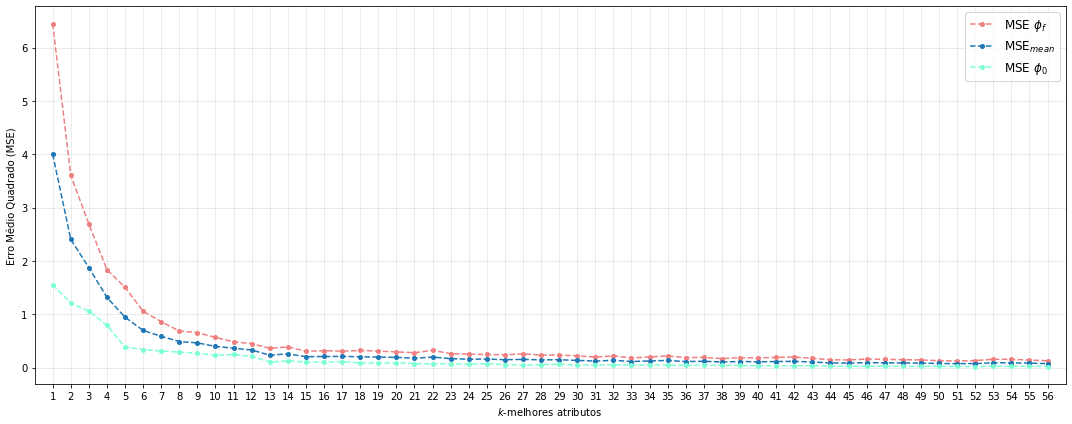

In [249]:
MSEphi0 = metrics_k_features["MSEphi0"]
MSEphif = metrics_k_features["MSEphif"]
MSE = metrics_k_features["MSEmean"]

plt.figure(figsize=(15, 6))
plt.plot(
    range(1, 57),
    MSEphif,
    "o--",
    color="lightcoral",
    markersize=4,
    label="MSE ${\phi_f}$",
)
plt.plot(range(1, 57), MSE, "o--", markersize=4, label="MSE$_{mean}$")
plt.plot(
    range(1, 57),
    MSEphi0,
    "o--",
    color="aquamarine",
    markersize=4,
    label="MSE ${\phi_0}$",
)
plt.legend(prop={'size': 12})
plt.xlabel("$k$-melhores atributos")
plt.xticks(range(1, 57))
plt.xlim((0, 57))
plt.ylabel("Erro Médio Quadrado (MSE)")
plt.grid(alpha=0.3)
plt.tight_layout()
# plt.savefig('img/k_best_features_mse.pdf', format='pdf')
plt.show()

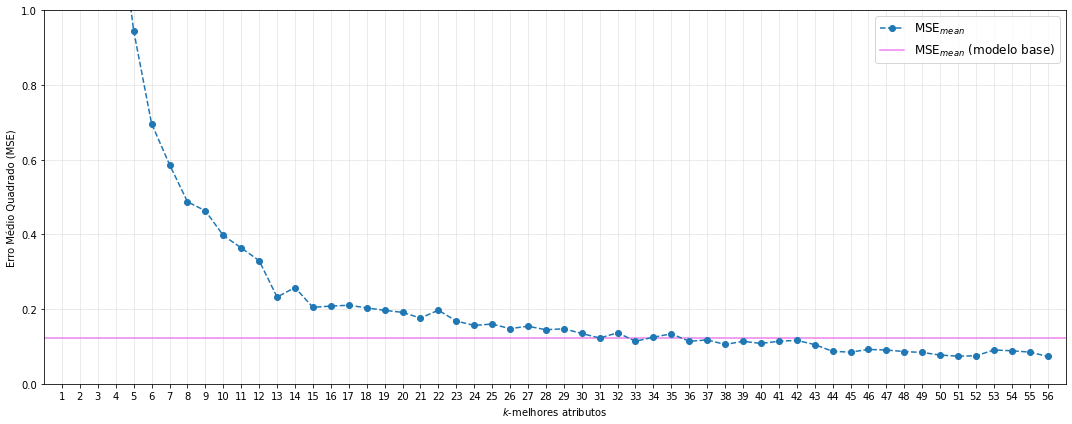

In [277]:
plt.figure(figsize=(15, 6))

plt.plot(range(1, 57), MSE, "o--", markersize=6, label="MSE$_{mean}$")
plt.axhline(0.1238, color='violet', zorder=1, label="MSE$_{mean}$ (modelo base)")

plt.legend(prop={'size': 12})
plt.xlabel("$k$-melhores atributos")
plt.xticks(range(1, 57))
plt.xlim((0, 57))
plt.ylim((0, 1))
plt.ylabel("Erro Médio Quadrado (MSE)")
plt.grid(alpha=0.3)
plt.tight_layout()
# plt.savefig('img/k_best_features_mse_zoom.pdf', format='pdf')
plt.show()

## Coeficiente de Determinação

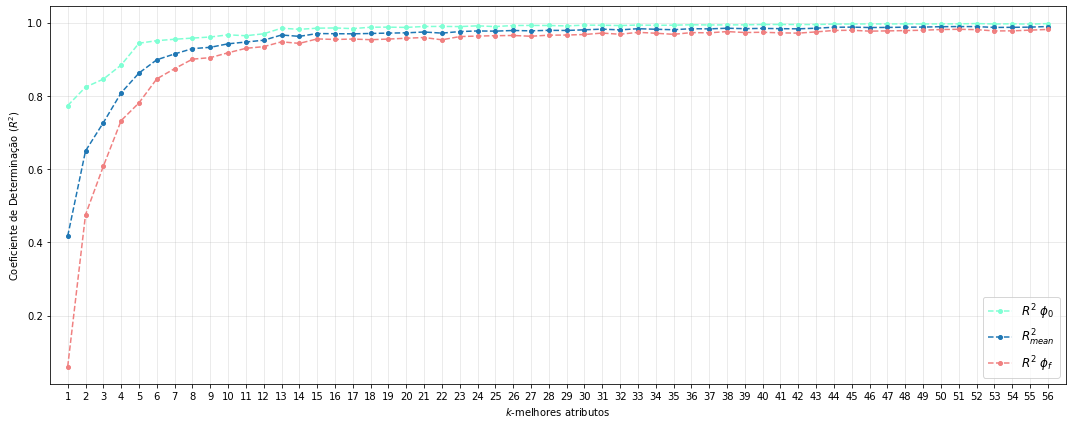

In [251]:
R2phi0 = metrics_k_features["R2phi0"]
R2phif = metrics_k_features["R2phif"]
R2 = metrics_k_features["R2mean"]

plt.figure(figsize=(15, 6))
plt.plot(
    range(1, 57),
    R2phi0,
    "o--",
    color="aquamarine",
    markersize=4,
    label="$R^2$ ${\phi_0}$",
)
plt.plot(range(1, 57), R2, "o--", markersize=4, label="$R^2_{mean}$")
plt.plot(
    range(1, 57),
    R2phif,
    "o--",
    color="lightcoral",
    markersize=4,
    label="$R^2$ ${\phi_f}$",
)

plt.legend(prop={'size': 12})
plt.xlabel("$k$-melhores atributos")
plt.xticks(range(1, 57))
plt.xlim((0, 57))
plt.ylabel("Coeficiente de Determinação ($R^2$)")
plt.grid(alpha=0.3)
plt.tight_layout()
# plt.savefig('img/k_best_features_r2.pdf', format='pdf')
plt.show()

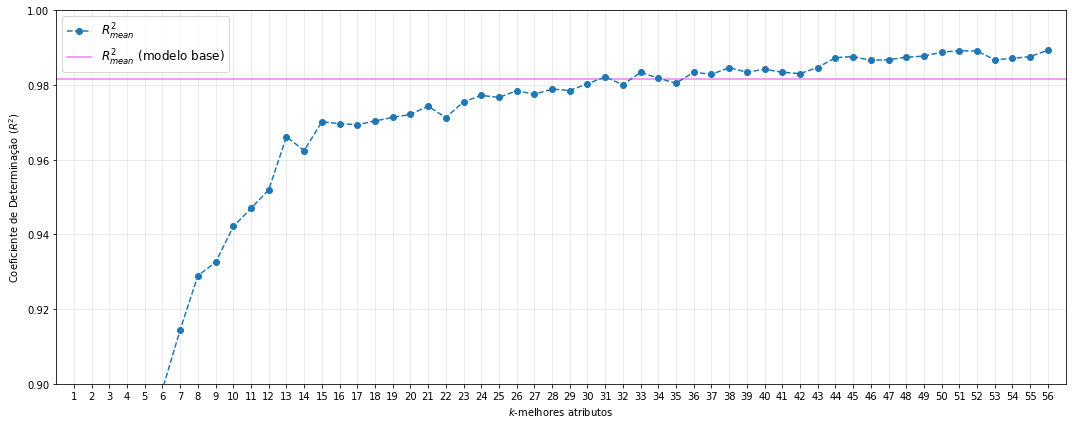

In [252]:
plt.figure(figsize=(15, 6))

plt.plot(range(1, 57), R2, "o--", markersize=6, label="$R^2_{mean}$")
plt.axhline(0.9816, label="$R^2_{mean}$ (modelo base)", color='violet', zorder=0)

plt.legend(prop={'size': 12})
plt.xlabel("$k$-melhores atributos")
plt.xticks(range(1, 57))
plt.xlim((0, 57))
plt.ylim((0.9, 1))
plt.ylabel("Coeficiente de Determinação ($R^2$)")
plt.grid(alpha=0.3)
plt.tight_layout()
# plt.savefig('img/k_best_features_r2_zoom.pdf', format='pdf')
plt.show()